# Import Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# Load the Dataset

In [111]:
import pandas as pd
data = pd.read_csv('HousePrice_data.csv')
data.head()

DATE  CS_Index  Year  Month        GDP  UNRATE   EmpRate  \
0  2004-01-01   141.646  2004      1  11923.447     5.7  71.26099   
1  2004-02-01   143.191  2004      2        NaN     5.6  71.20380   
2  2004-03-01   145.058  2004      3        NaN     5.8  71.04695   
3  2004-04-01   146.592  2004      4  12112.815     5.6  71.19492   
4  2004-05-01   148.185  2004      5        NaN     5.6  71.14230   

   InterestRate  ConstMaterial    CPI  New Monthly House   WorkingPop  \
0          1.00          150.0  186.3                3.8  187568500.0   
1          1.01          153.4  186.7                3.7  187831800.0   
2          1.00          156.5  187.1                3.6  188106500.0   
3          1.00          160.1  187.4                4.0  188337000.0   
4          1.00          162.7  188.2                3.8  188540100.0   

   Subsidy  Median Household Income  Total_Household  
0   27.201                  65760.0         112000.0  
1   27.201                  65760.0         112000.0  
2   27.201                  65760.0         112000.0  
3   27.201                  65760.0         112000.0  
4   27.201                  65760.0         112000.0

# Data Preprocessing

In [112]:
data.isnull().sum()

DATE                         0
CS_Index                     0
Year                         0
Month                        0
GDP                        160
UNRATE                       0
EmpRate                      0
InterestRate                 0
ConstMaterial                0
CPI                          0
New Monthly House            0
WorkingPop                   0
Subsidy                     13
Median Household Income     13
Total_Household              1
dtype: int64

In [113]:
from sklearn.impute import SimpleImputer
import pandas as pd
data_without_date = data.drop(columns=['DATE'])
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_without_date), columns=data_without_date.columns)
data_imputed.head()

CS_Index    Year  Month          GDP  UNRATE   EmpRate  InterestRate  \
0   141.646  2004.0    1.0  11923.44700     5.7  71.26099          1.00   
1   143.191  2004.0    2.0  18180.81858     5.6  71.20380          1.01   
2   145.058  2004.0    3.0  18180.81858     5.8  71.04695          1.00   
3   146.592  2004.0    4.0  12112.81500     5.6  71.19492          1.00   
4   148.185  2004.0    5.0  18180.81858     5.6  71.14230          1.00   

   ConstMaterial    CPI  New Monthly House   WorkingPop  Subsidy  \
0          150.0  186.3                3.8  187568500.0   27.201   
1          153.4  186.7                3.7  187831800.0   27.201   
2          156.5  187.1                3.6  188106500.0   27.201   
3          160.1  187.4                4.0  188337000.0   27.201   
4          162.7  188.2                3.8  188540100.0   27.201   

   Median Household Income  Total_Household  
0                  65760.0         112000.0  
1                  65760.0         112000.0  
2                  65760.0         112000.0  
3                  65760.0         112000.0  
4                  65760.0         112000.0

In [114]:
data_imputed.isnull().sum()

CS_Index                   0
Year                       0
Month                      0
GDP                        0
UNRATE                     0
EmpRate                    0
InterestRate               0
ConstMaterial              0
CPI                        0
New Monthly House          0
WorkingPop                 0
Subsidy                    0
Median Household Income    0
Total_Household            0
dtype: int64

In [115]:
# Standardize data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

In [116]:
date = data['DATE']
data_scaled.insert(0, 'DATE', date)
data_scaled = data_scaled.reset_index(drop=True)

data_scaled.head()

DATE  CS_Index      Year     Month       GDP    UNRATE   EmpRate  \
0  2004-01-01 -0.992981 -1.647216 -1.581638 -2.523327 -0.087210  0.821912   
1  2004-02-01 -0.961103 -1.647216 -1.292869  0.000000 -0.134870  0.794518   
2  2004-03-01 -0.922581 -1.647216 -1.004101  0.000000 -0.039551  0.719386   
3  2004-04-01 -0.890930 -1.647216 -0.715332 -2.446963 -0.134870  0.790264   
4  2004-05-01 -0.858061 -1.647216 -0.426563  0.000000 -0.134870  0.765059   

   InterestRate  ConstMaterial       CPI  New Monthly House  WorkingPop  \
0     -0.286992      -1.472877 -1.662062          -1.327085   -2.432702   
1     -0.281391      -1.403853 -1.648783          -1.379216   -2.385946   
2     -0.286992      -1.340919 -1.635503          -1.431348   -2.337165   
3     -0.286992      -1.267834 -1.625543          -1.222821   -2.296234   
4     -0.286992      -1.215050 -1.598984          -1.327085   -2.260168   

    Subsidy  Median Household Income  Total_Household  
0 -1.408165                -0.738828        -1.723439  
1 -1.408165                -0.738828        -1.723439  
2 -1.408165                -0.738828        -1.723439  
3 -1.408165                -0.738828        -1.723439  
4 -1.408165                -0.738828        -1.723439

# Exploratory Data Analysis

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



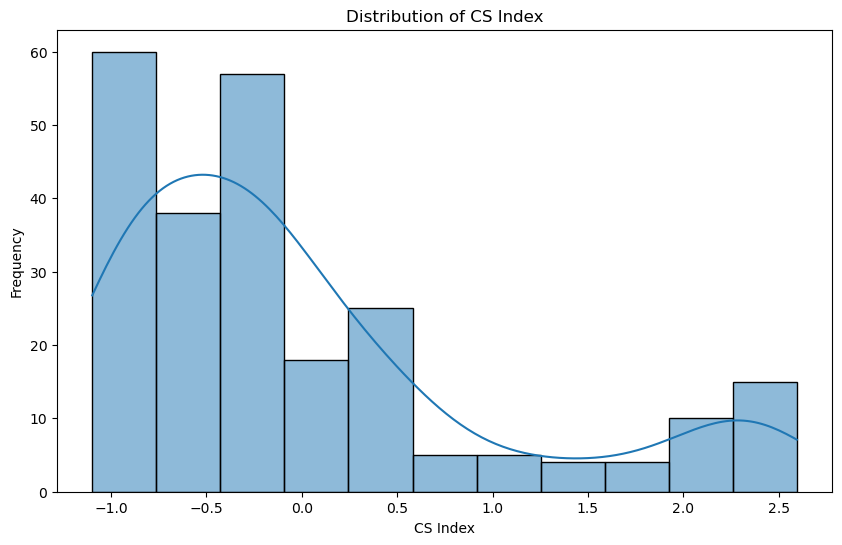

In [117]:
# Histogram for distribution of CS Index
plt.figure(figsize=(10, 6))
sns.histplot(data_scaled['CS_Index'], kde=True)
plt.title('Distribution of CS Index')
plt.xlabel('CS Index')
plt.ylabel('Frequency')
plt.show()


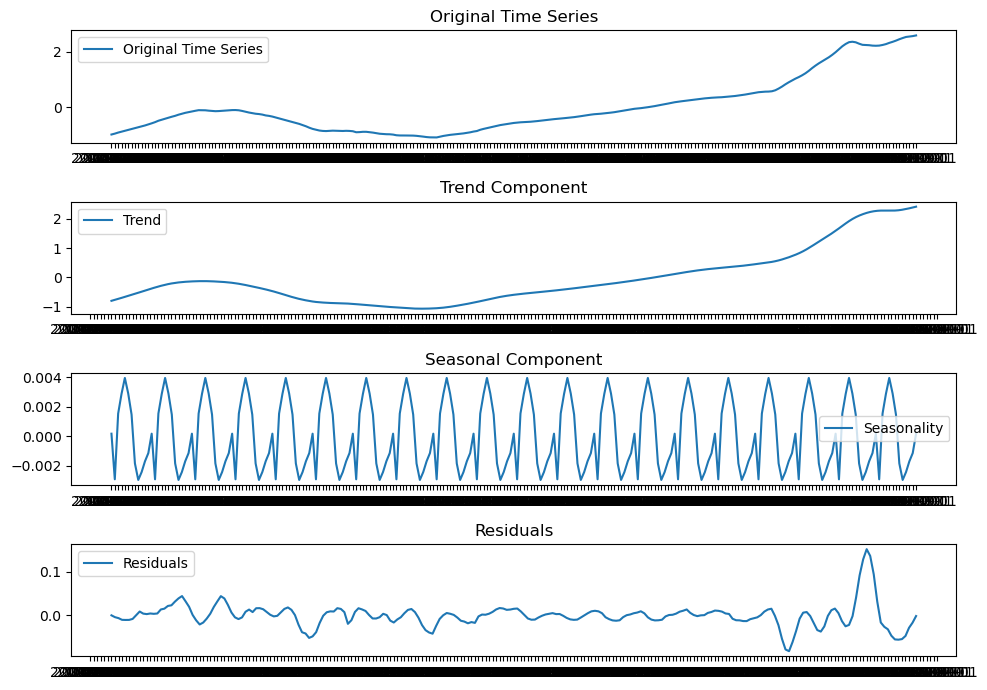

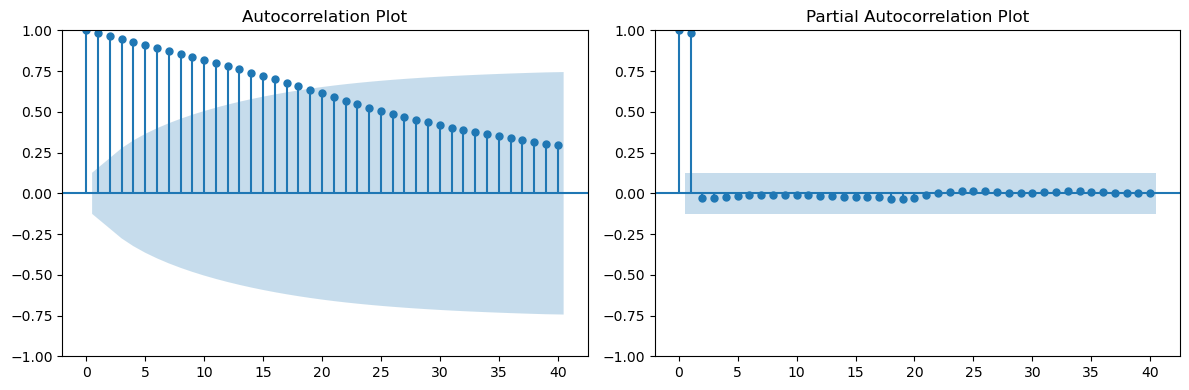

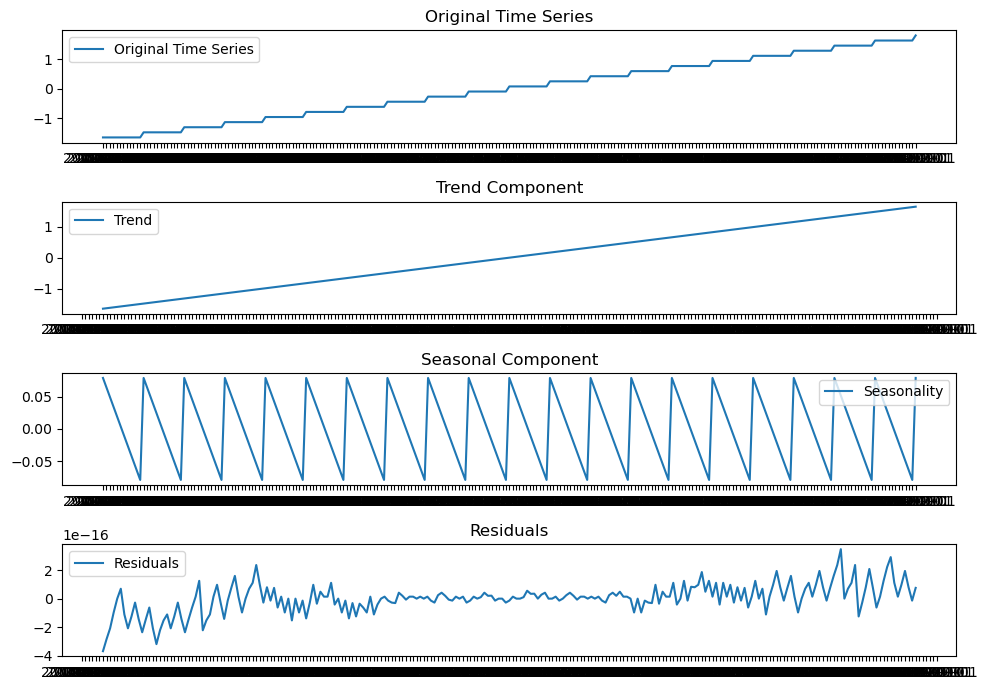

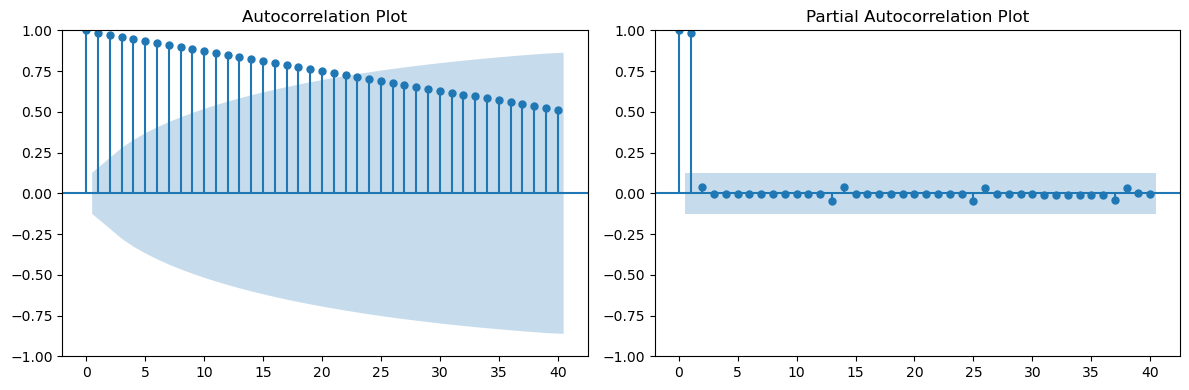

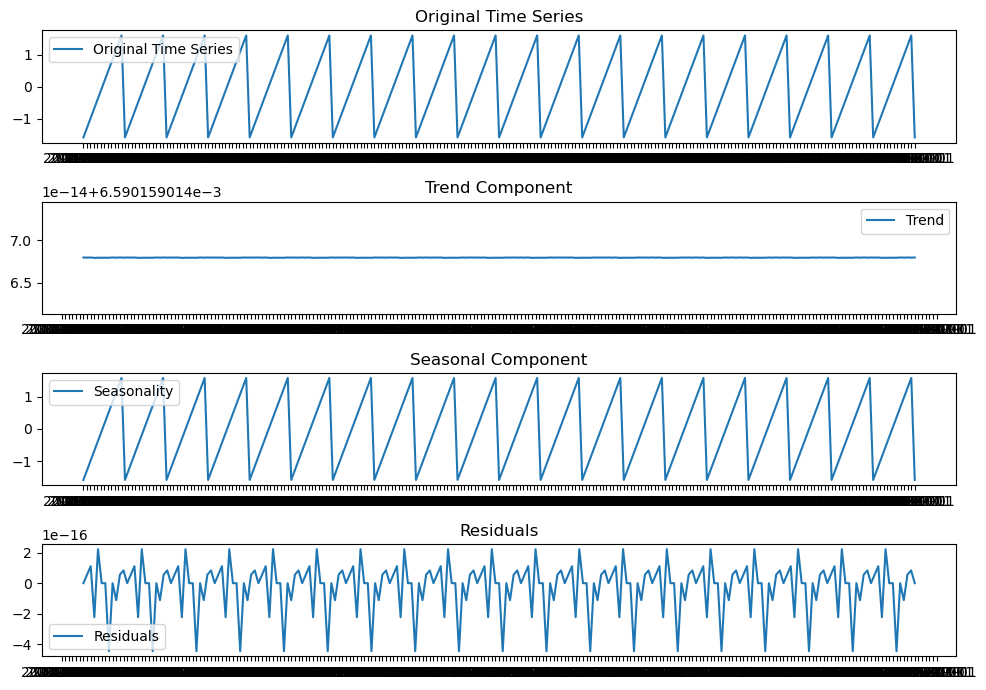

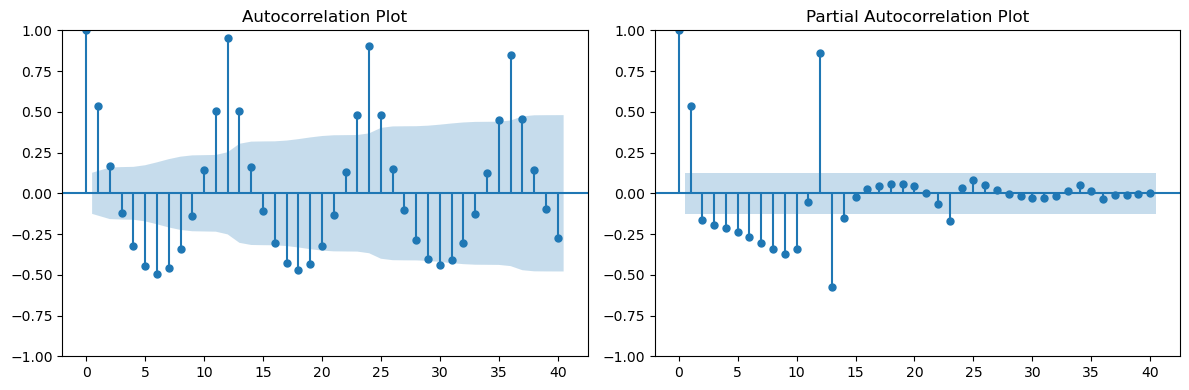

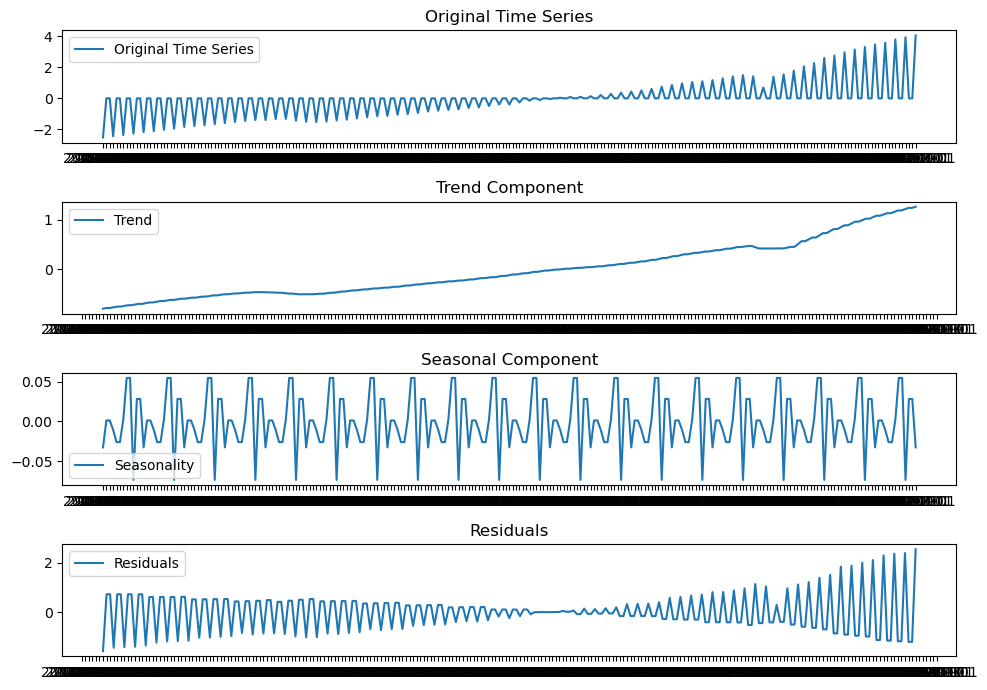

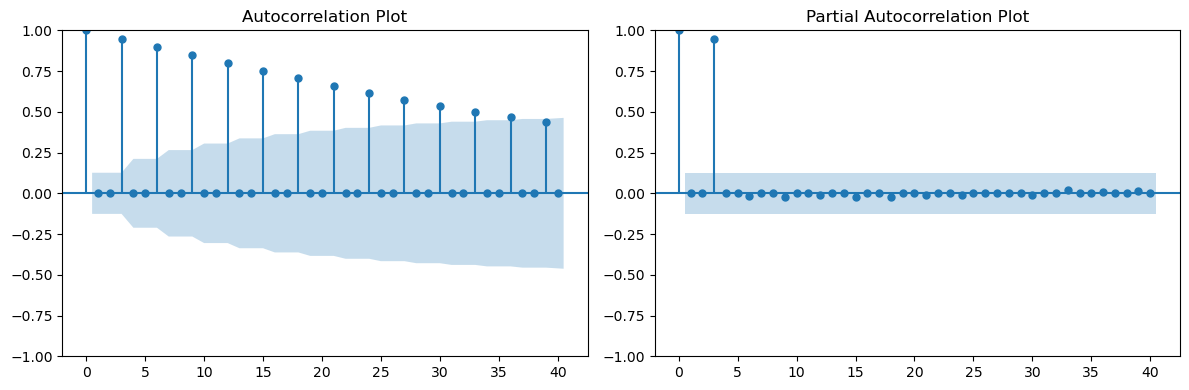

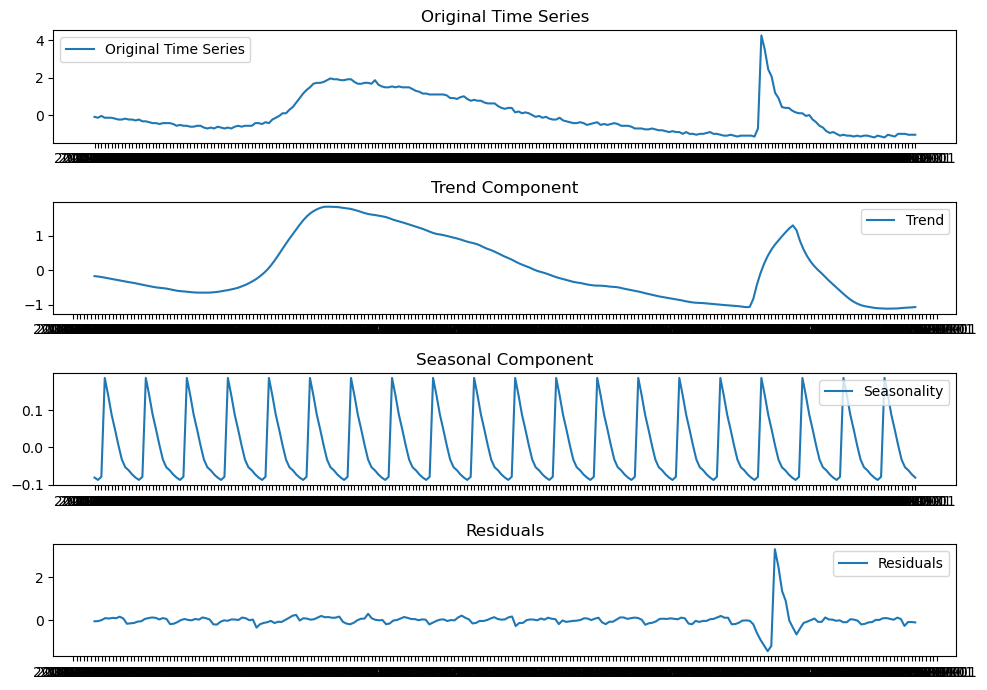

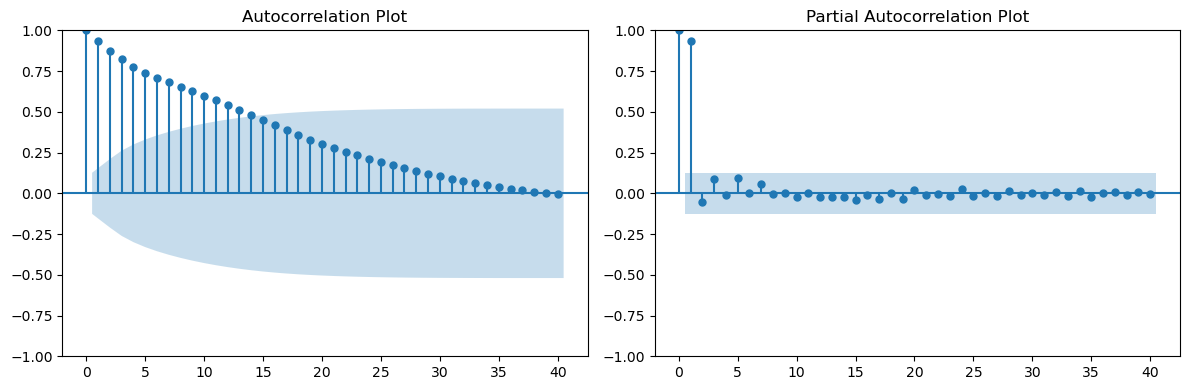

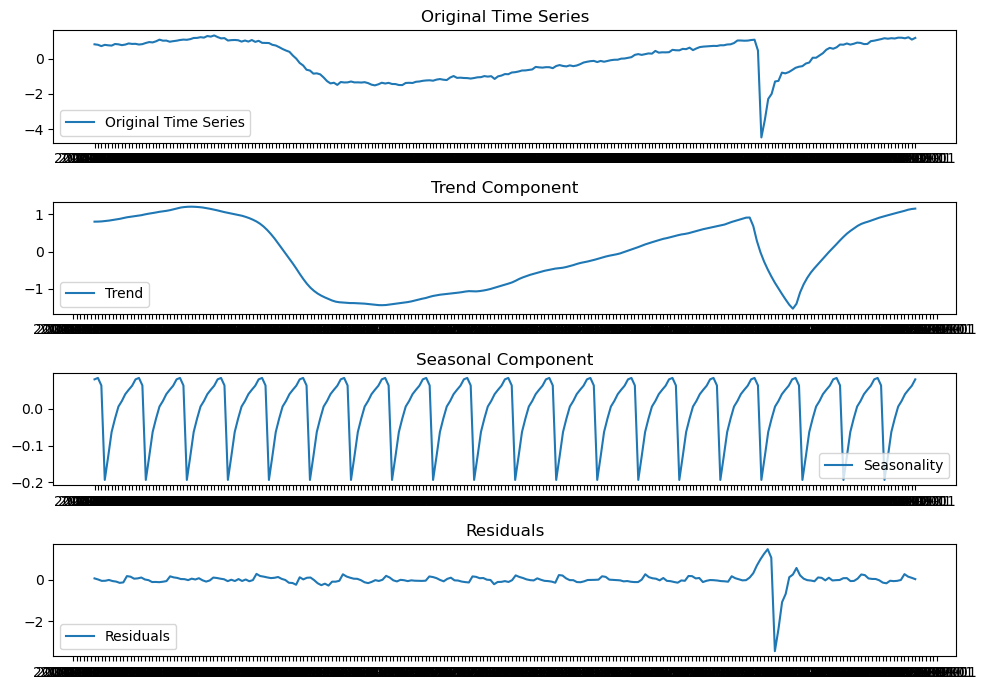

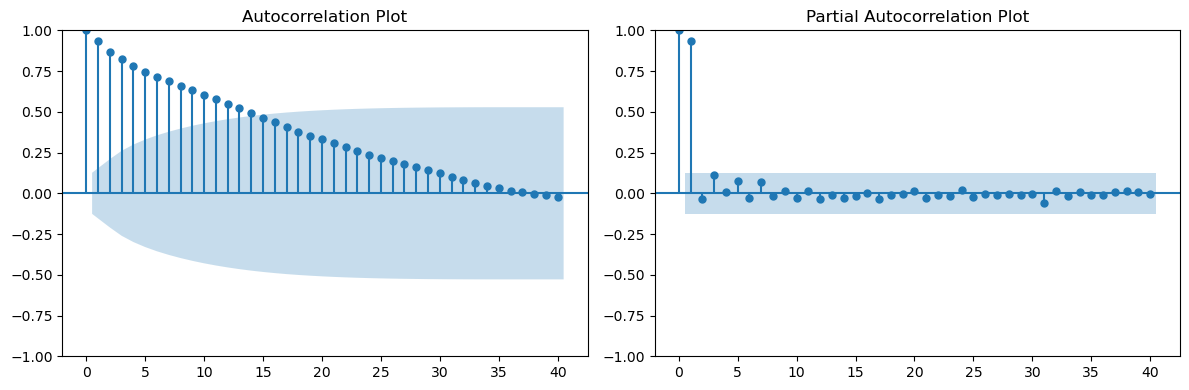

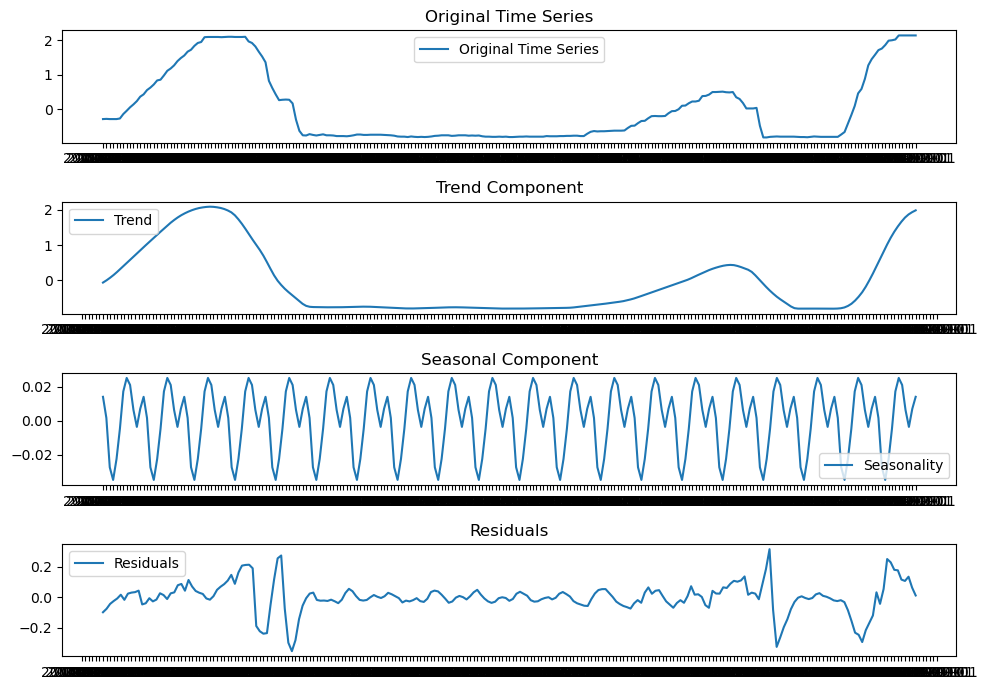

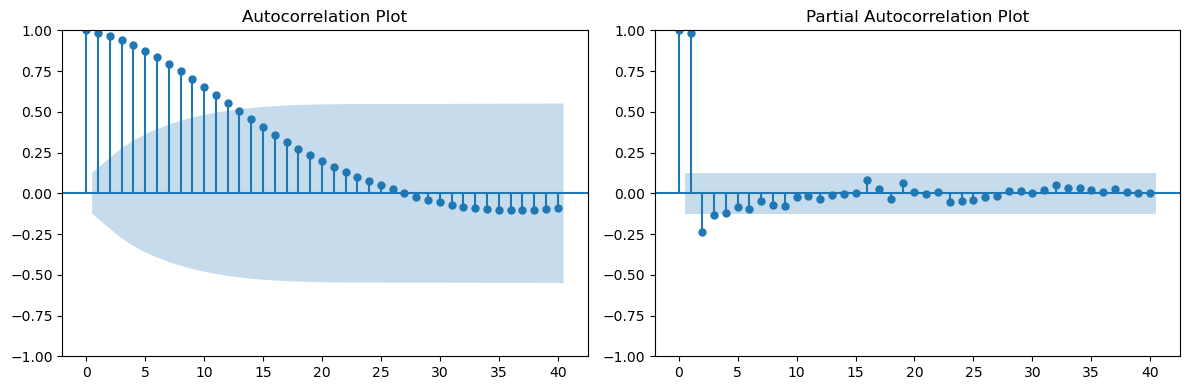

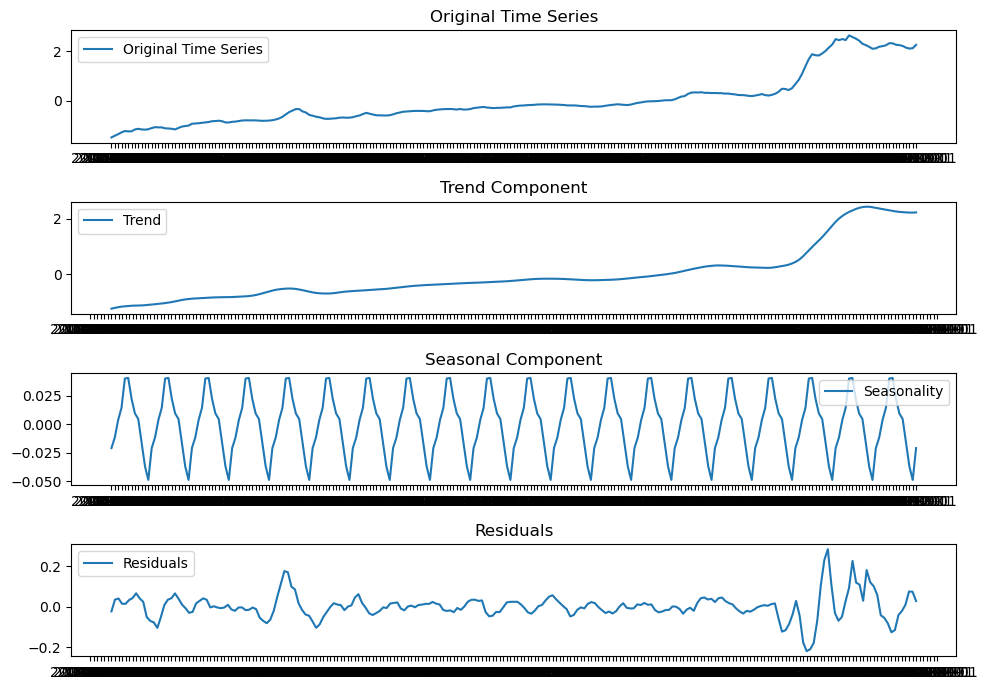

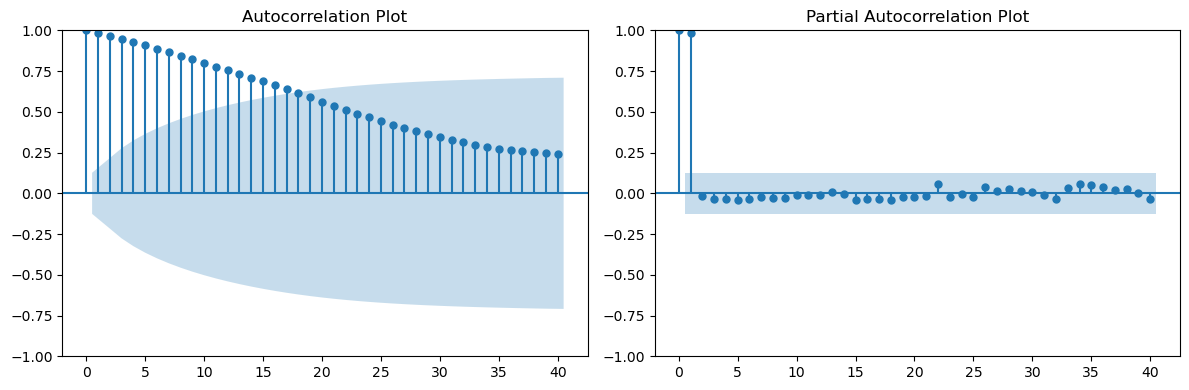

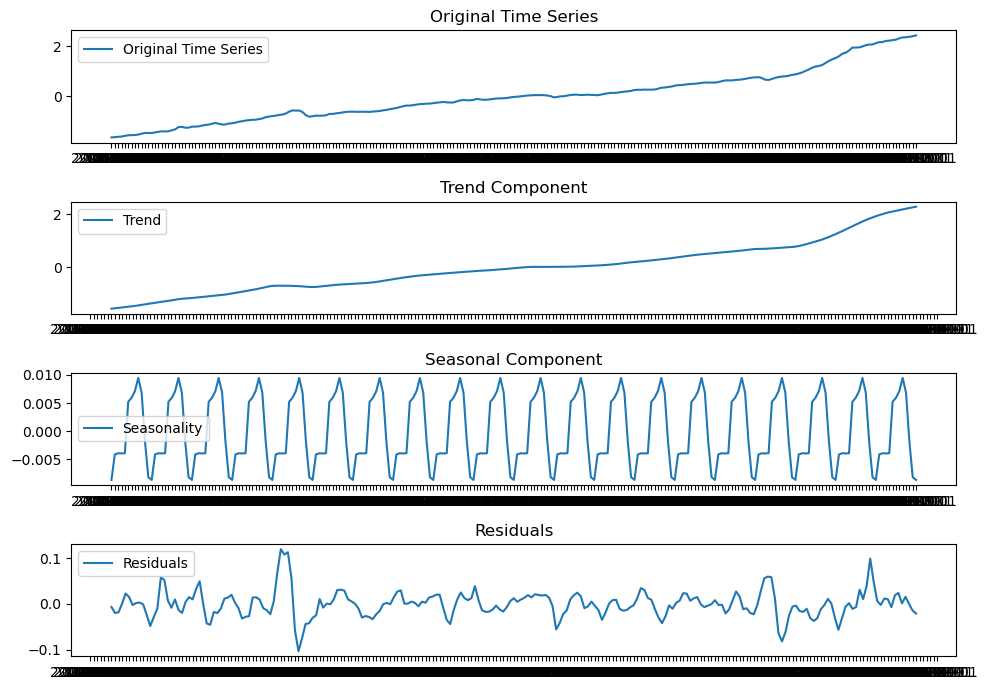

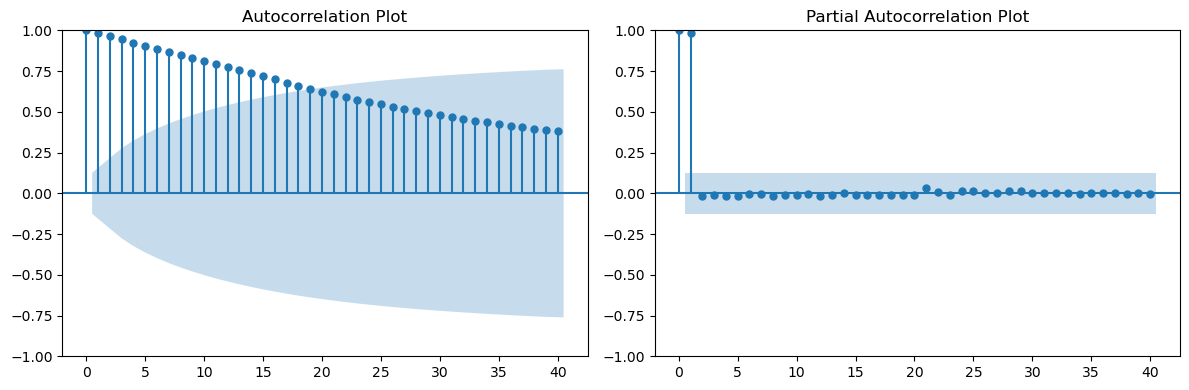

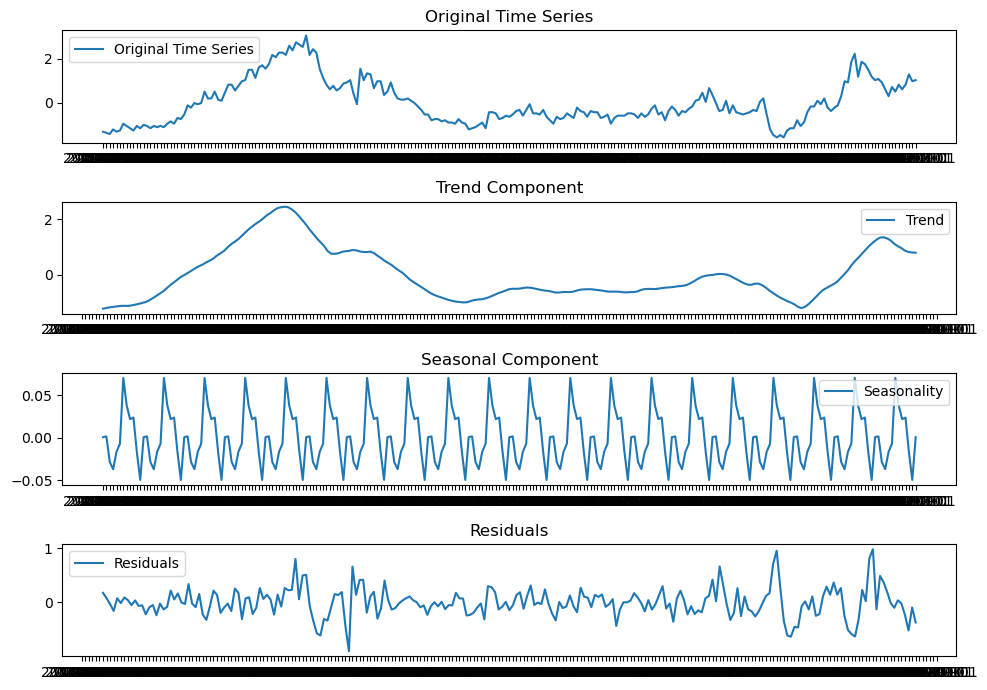

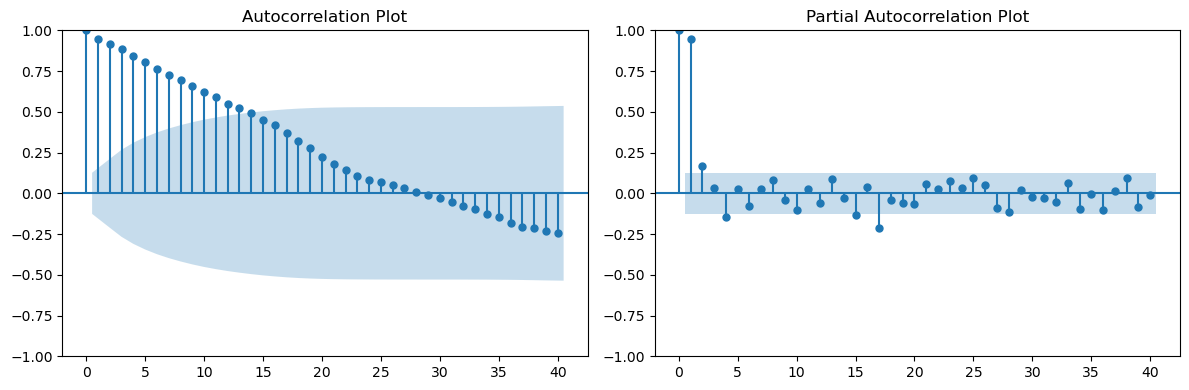

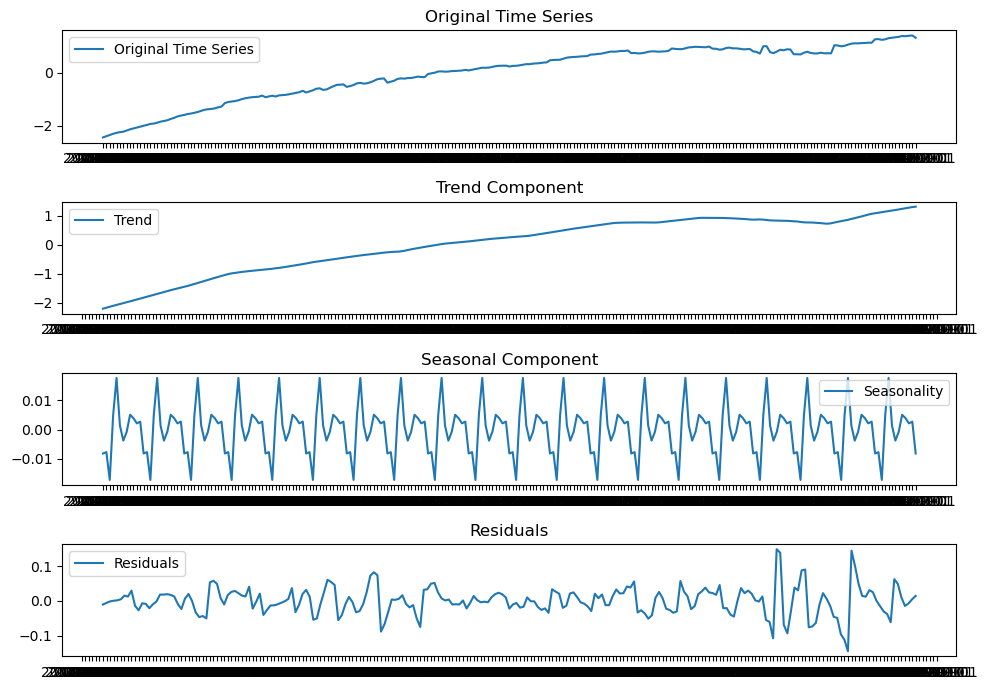

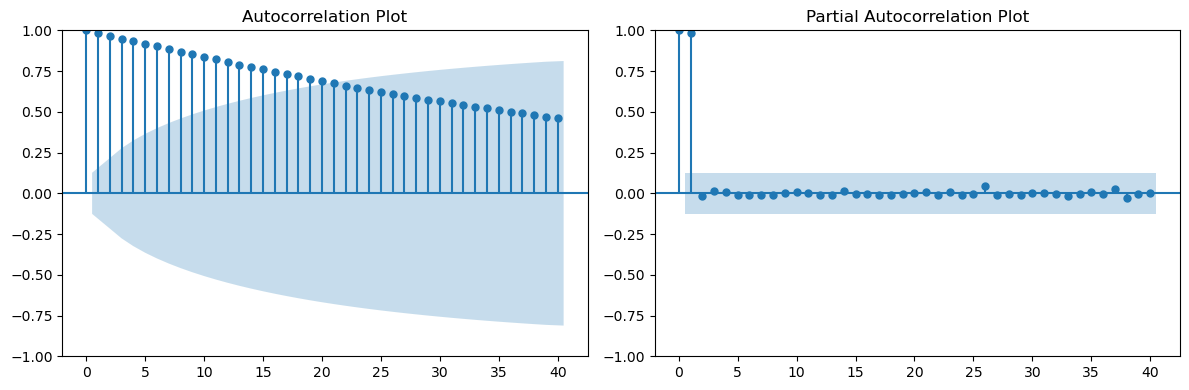

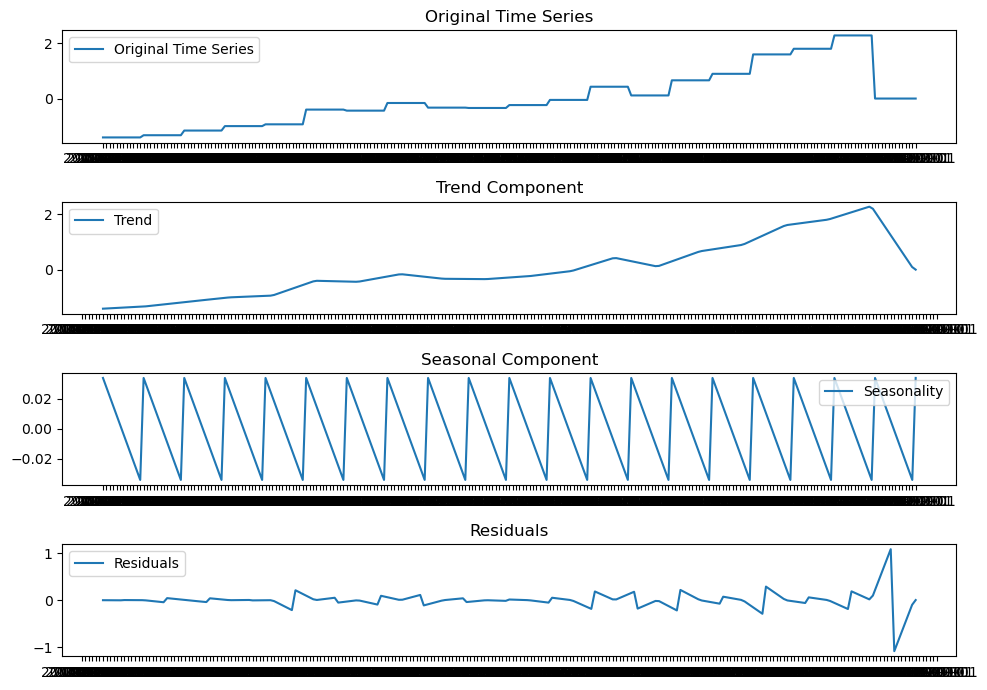

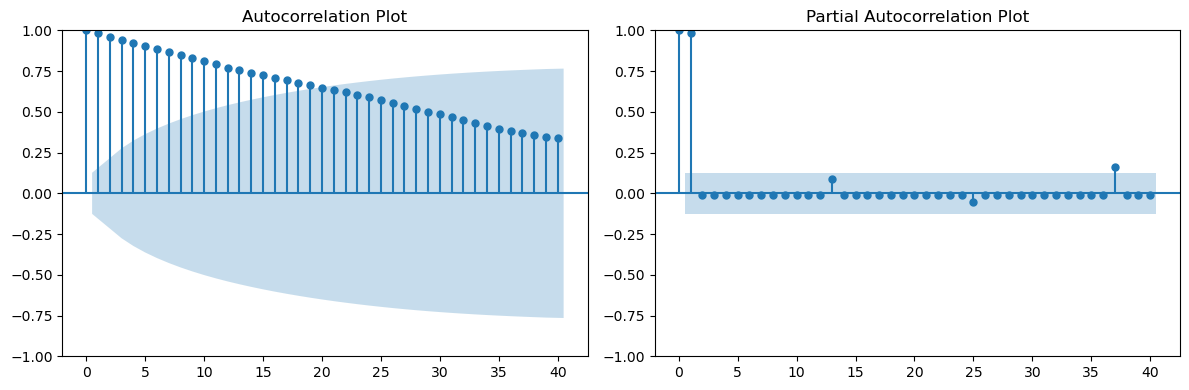

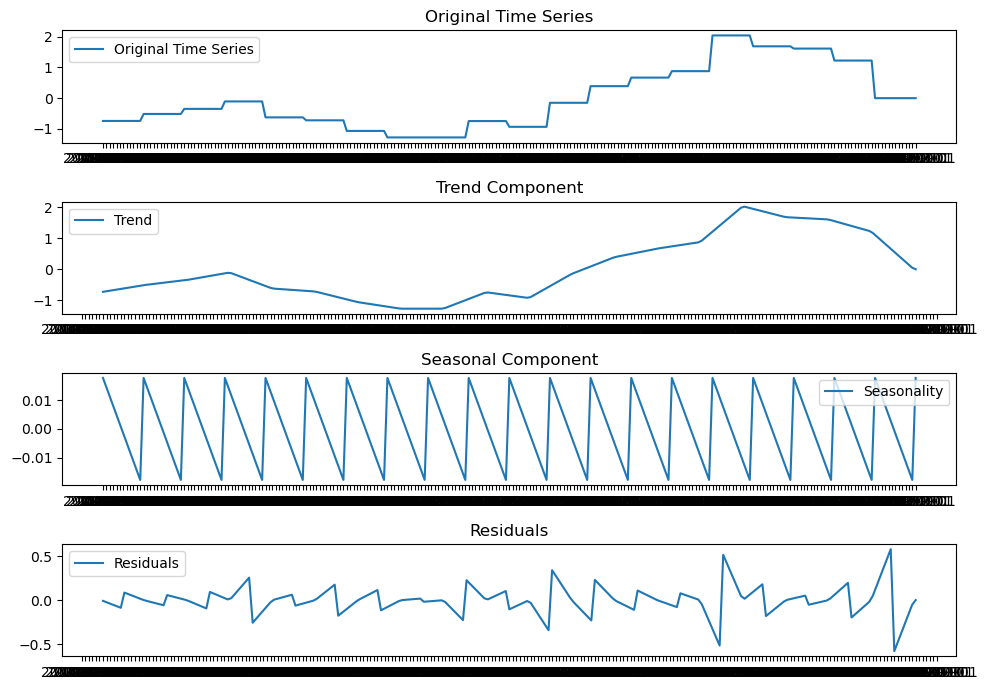

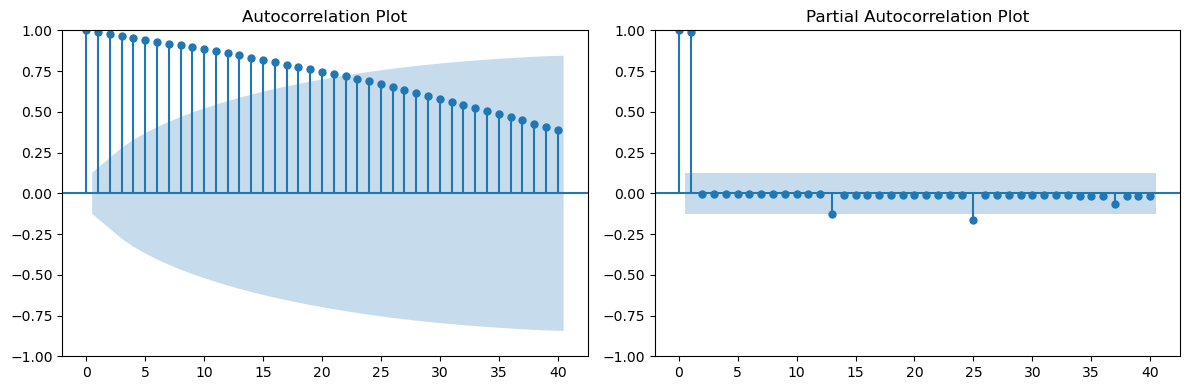

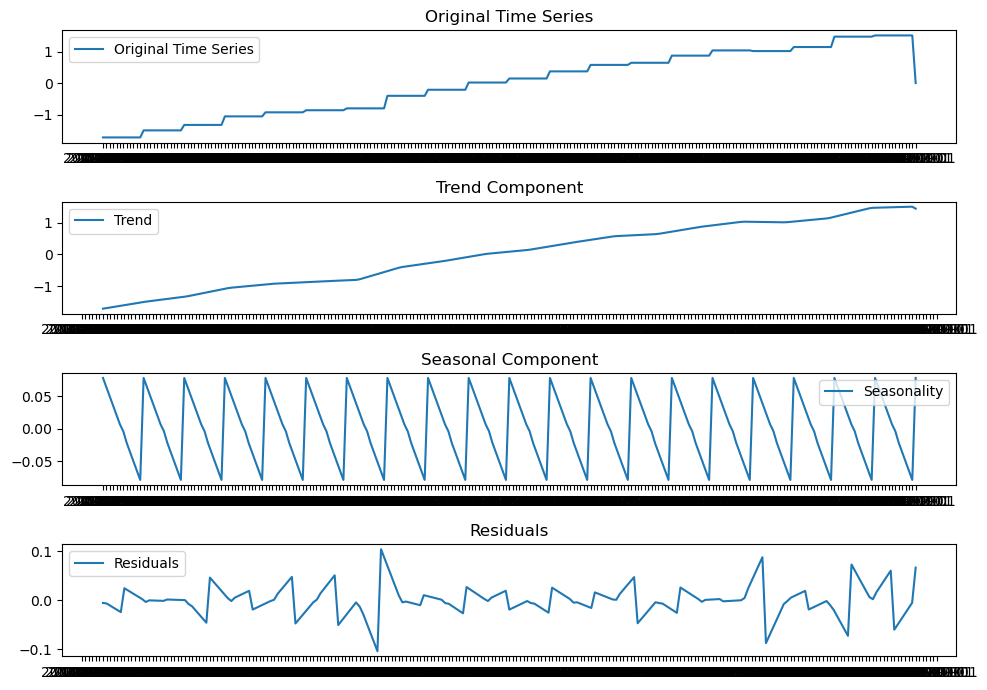

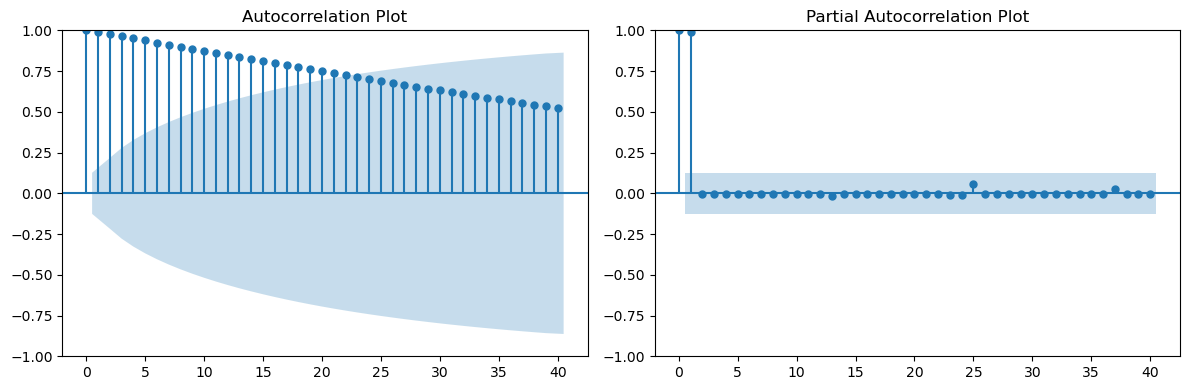

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in data_scaled.columns:
    if column != 'DATE':  
        
        decomposition = seasonal_decompose(data_scaled[column], model='additive', period=12)
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid

       
        plt.figure(figsize=(10, 7))

        plt.subplot(4, 1, 1)
        plt.plot(data_scaled['DATE'], data_scaled[column], label='Original Time Series')
        plt.legend()
        plt.title('Original Time Series')

        plt.subplot(4, 1, 2)
        plt.plot(data_scaled['DATE'], trend, label='Trend')
        plt.legend()
        plt.title('Trend Component')

        plt.subplot(4, 1, 3)
        plt.plot(data_scaled['DATE'], seasonal, label='Seasonality')
        plt.legend()
        plt.title('Seasonal Component')

        plt.subplot(4, 1, 4)
        plt.plot(data_scaled['DATE'], residual, label='Residuals')
        plt.legend()
        plt.title('Residuals')

        plt.tight_layout()
        plt.show()

        # Autocorrelation and Partial Autocorrelation Plots
        plt.figure(figsize=(12, 4))

        # Autocorrelation Plot
        plt.subplot(1, 2, 1)
        plot_acf(data_scaled[column], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

        # Partial Autocorrelation Plot
        plt.subplot(1, 2, 2)
        plot_pacf(data_scaled[column], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

        plt.tight_layout()
        plt.show()


C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

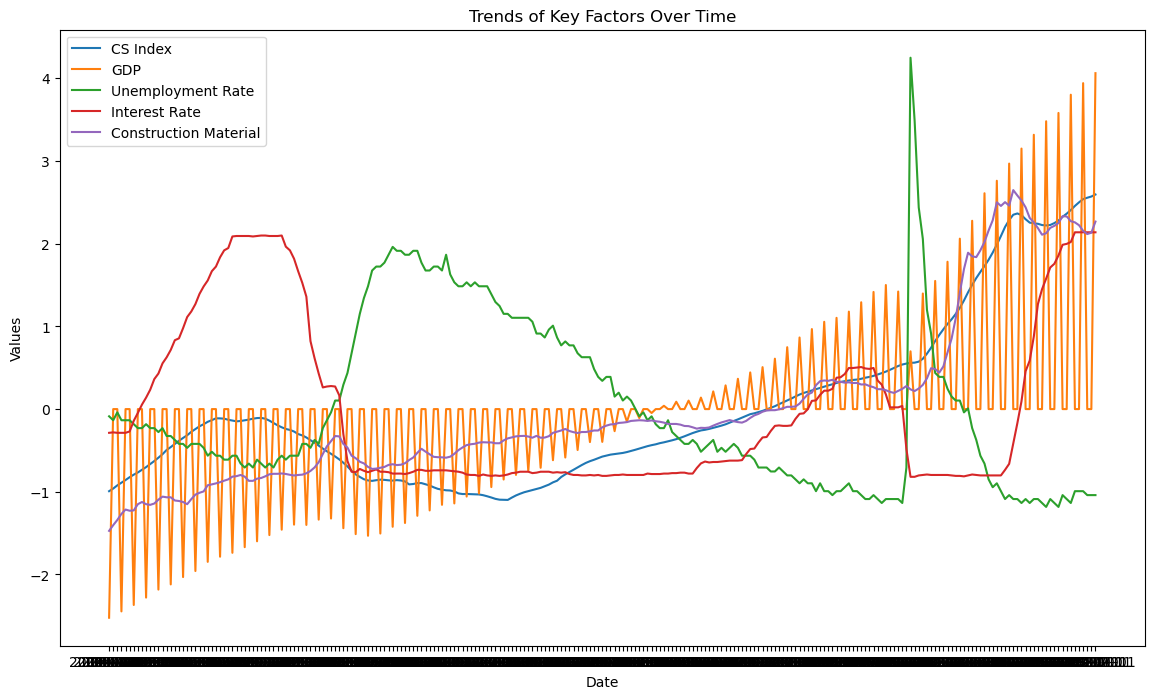

In [119]:
# Line Plots to show trends over time

plt.figure(figsize=(14, 8))
sns.lineplot(data=data_scaled, x='DATE', y='CS_Index', label='CS Index')
sns.lineplot(data=data_scaled, x='DATE', y='GDP', label='GDP')
sns.lineplot(data=data_scaled, x='DATE', y='UNRATE', label='Unemployment Rate')
sns.lineplot(data=data_scaled, x='DATE', y='InterestRate', label='Interest Rate')
sns.lineplot(data=data_scaled, x='DATE', y='ConstMaterial', label='Construction Material')
plt.title('Trends of Key Factors Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

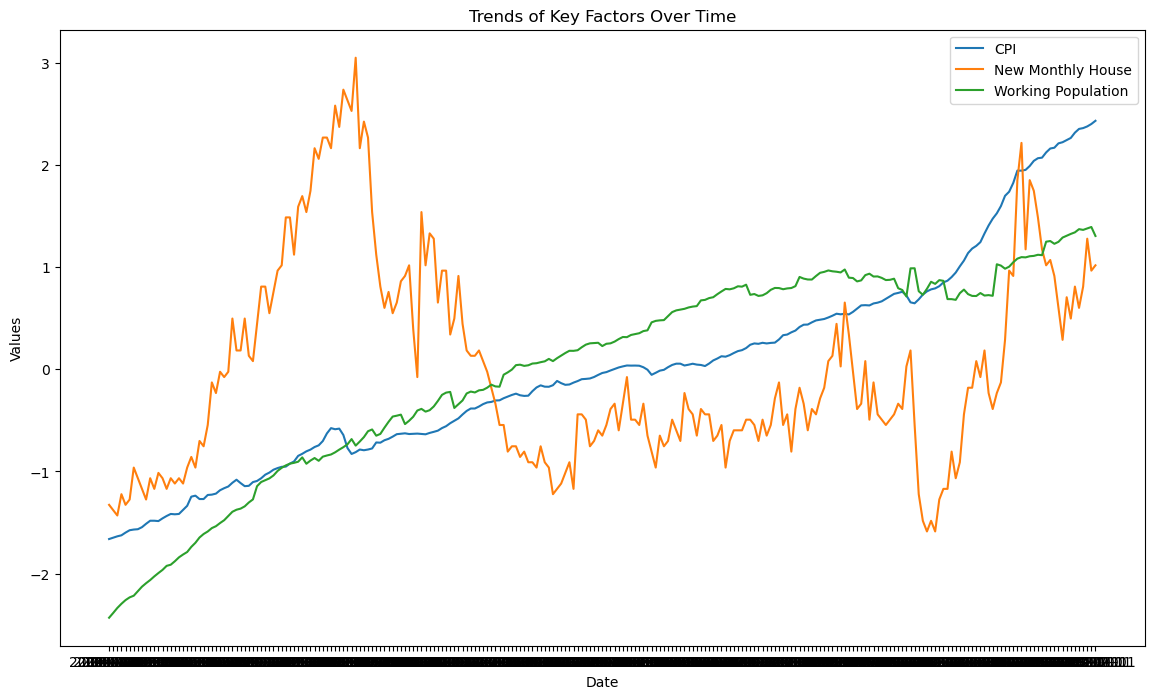

In [108]:
# Line Plots to show trends over time

plt.figure(figsize=(14, 8))
sns.lineplot(data=data_scaled, x='DATE', y='CPI', label='CPI')
sns.lineplot(data=data_scaled, x='DATE', y='New Monthly House', label='New Monthly House')
sns.lineplot(data=data_scaled, x='DATE', y='WorkingPop', label='Working Population')
plt.title('Trends of Key Factors Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

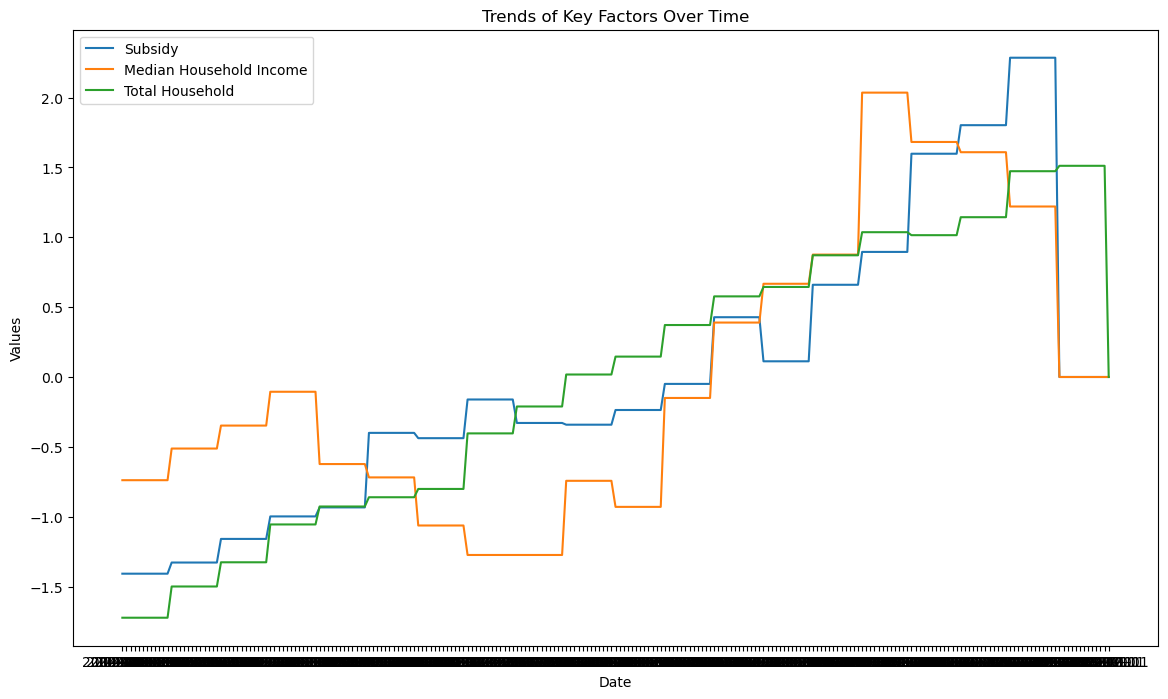

In [121]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_scaled, x='DATE', y='Subsidy', label='Subsidy')
sns.lineplot(data=data_scaled, x='DATE', y='Median Household Income', label='Median Household Income')
sns.lineplot(data=data_scaled, x='DATE', y='Total_Household', label='Total Household')
plt.title('Trends of Key Factors Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

## Scatter Plots to show Relationships

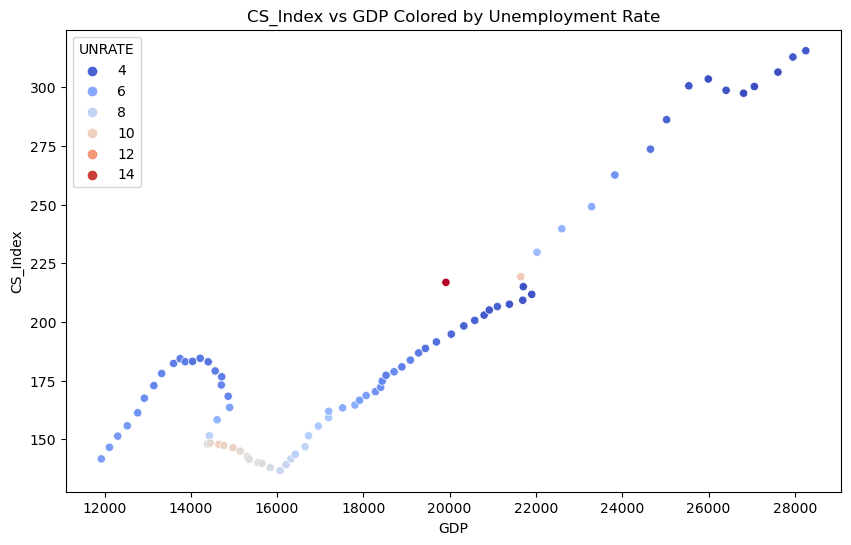

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP', y='CS_Index', hue='UNRATE', palette='coolwarm')
plt.title('CS_Index vs GDP Colored by Unemployment Rate')
plt.xlabel('GDP')
plt.ylabel('CS_Index')
plt.show()


## Correlation Heat Map

In [123]:
corr_matrix = data_scaled.drop(columns = 'DATE').corr()
corr_matrix

CS_Index      Year         Month       GDP    UNRATE  \
CS_Index                 1.000000  0.766444  3.370217e-02  0.526393 -0.562805   
Year                     0.766444  1.000000 -1.189376e-02  0.564330 -0.301313   
Month                    0.033702 -0.011894  1.000000e+00  0.010381 -0.018070   
GDP                      0.526393  0.564330  1.038063e-02  1.000000 -0.241687   
UNRATE                  -0.562805 -0.301313 -1.807030e-02 -0.241687  1.000000   
EmpRate                  0.444876 -0.022084  7.570024e-03  0.088576 -0.894010   
InterestRate             0.369233 -0.140404  2.860332e-02  0.044372 -0.557495   
ConstMaterial            0.915519  0.877954  2.642525e-02  0.559246 -0.372886   
CPI                      0.854477  0.964083  4.479573e-02  0.581538 -0.336508   
New Monthly House        0.158042 -0.044459  3.157653e-02  0.046114  0.009698   
WorkingPop               0.588444  0.952759  4.966634e-02  0.512529 -0.198398   
Subsidy                  0.666667  0.875677  1.512518e-17  0.460292 -0.162529   
Median Household Income  0.680910  0.701823  1.051812e-17  0.386133 -0.488684   
Total_Household          0.724217  0.988731 -2.820153e-18  0.530404 -0.321766   

                          EmpRate  InterestRate  ConstMaterial       CPI  \
CS_Index                 0.444876      0.369233       0.915519  0.854477   
Year                    -0.022084     -0.140404       0.877954  0.964083   
Month                    0.007570      0.028603       0.026425  0.044796   
GDP                      0.088576      0.044372       0.559246  0.581538   
UNRATE                  -0.894010     -0.557495      -0.372886 -0.336508   
EmpRate                  1.000000      0.755104       0.173783  0.072880   
InterestRate             0.755104      1.000000       0.068600  0.005470   
ConstMaterial            0.173783      0.068600       1.000000  0.954839   
CPI                      0.072880      0.005470       0.954839  1.000000   
New Monthly House        0.174431      0.287974       0.174947  0.096172   
WorkingPop              -0.163342     -0.234050       0.759479  0.895919   
Subsidy                 -0.115846     -0.306331       0.780016  0.807919   
Median Household Income  0.304293      0.076529       0.572496  0.605861   
Total_Household         -0.024445     -0.162987       0.843749  0.940104   

                         New Monthly House  WorkingPop       Subsidy  \
CS_Index                          0.158042    0.588444  6.666670e-01   
Year                             -0.044459    0.952759  8.756774e-01   
Month                             0.031577    0.049666  1.512518e-17   
GDP                               0.046114    0.512529  4.602917e-01   
UNRATE                            0.009698   -0.198398 -1.625293e-01   
EmpRate                           0.174431   -0.163342 -1.158464e-01   
InterestRate                      0.287974   -0.234050 -3.063309e-01   
ConstMaterial                     0.174947    0.759479  7.800161e-01   
CPI                               0.096172    0.895919  8.079195e-01   
New Monthly House                 1.000000   -0.005930 -3.771846e-02   
WorkingPop                       -0.005930    1.000000  8.028188e-01   
Subsidy                          -0.037718    0.802819  1.000000e+00   
Median Household Income          -0.104348    0.575441  7.814533e-01   
Total_Household                  -0.068417    0.961592  8.725225e-01   

                         Median Household Income  Total_Household  
CS_Index                            6.809104e-01     7.242166e-01  
Year                                7.018234e-01     9.887309e-01  
Month                               1.051812e-17    -2.820153e-18  
GDP                                 3.861332e-01     5.304042e-01  
UNRATE                             -4.886839e-01    -3.217658e-01  
EmpRate                             3.042934e-01    -2.444504e-02  
InterestRate                        7.652883e-02    -1.629873e-01  
ConstMaterial                       5.72496

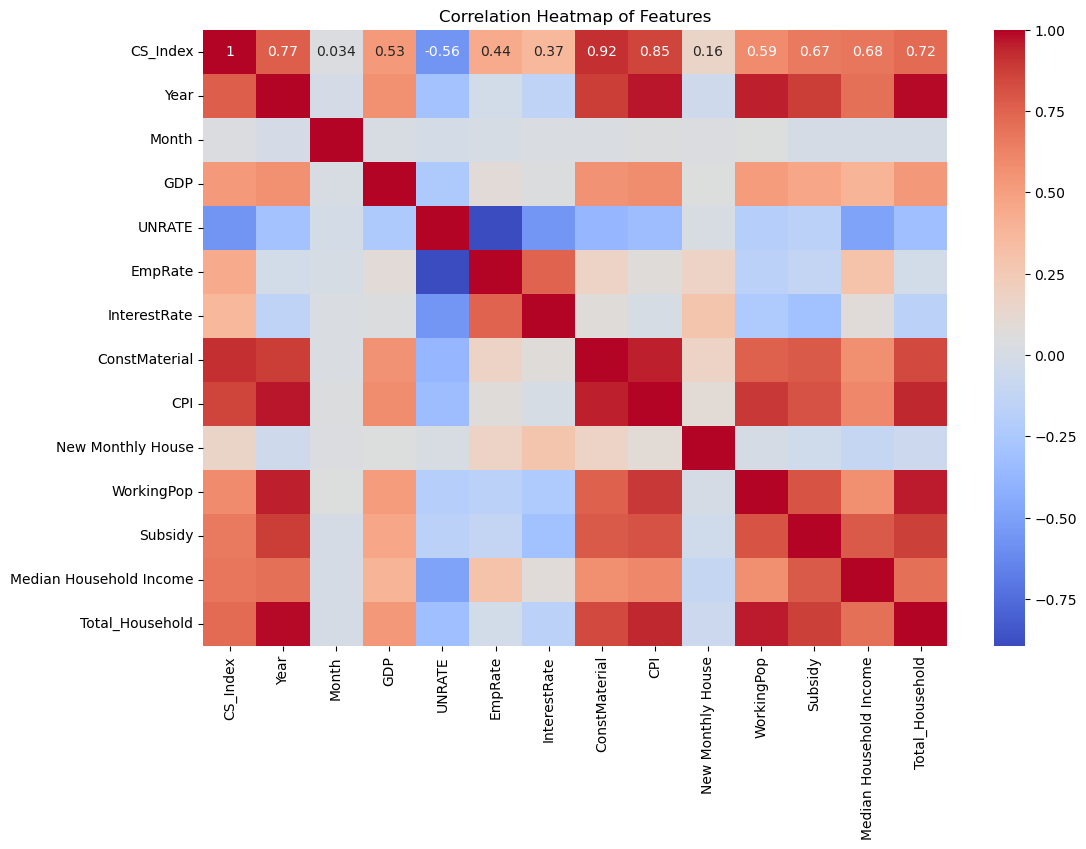

In [124]:
plt.figure(figsize=(12, 8))
corr_matrix = data_scaled.drop(columns = 'DATE').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


## Pair Plot for Pairwise Relationships

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

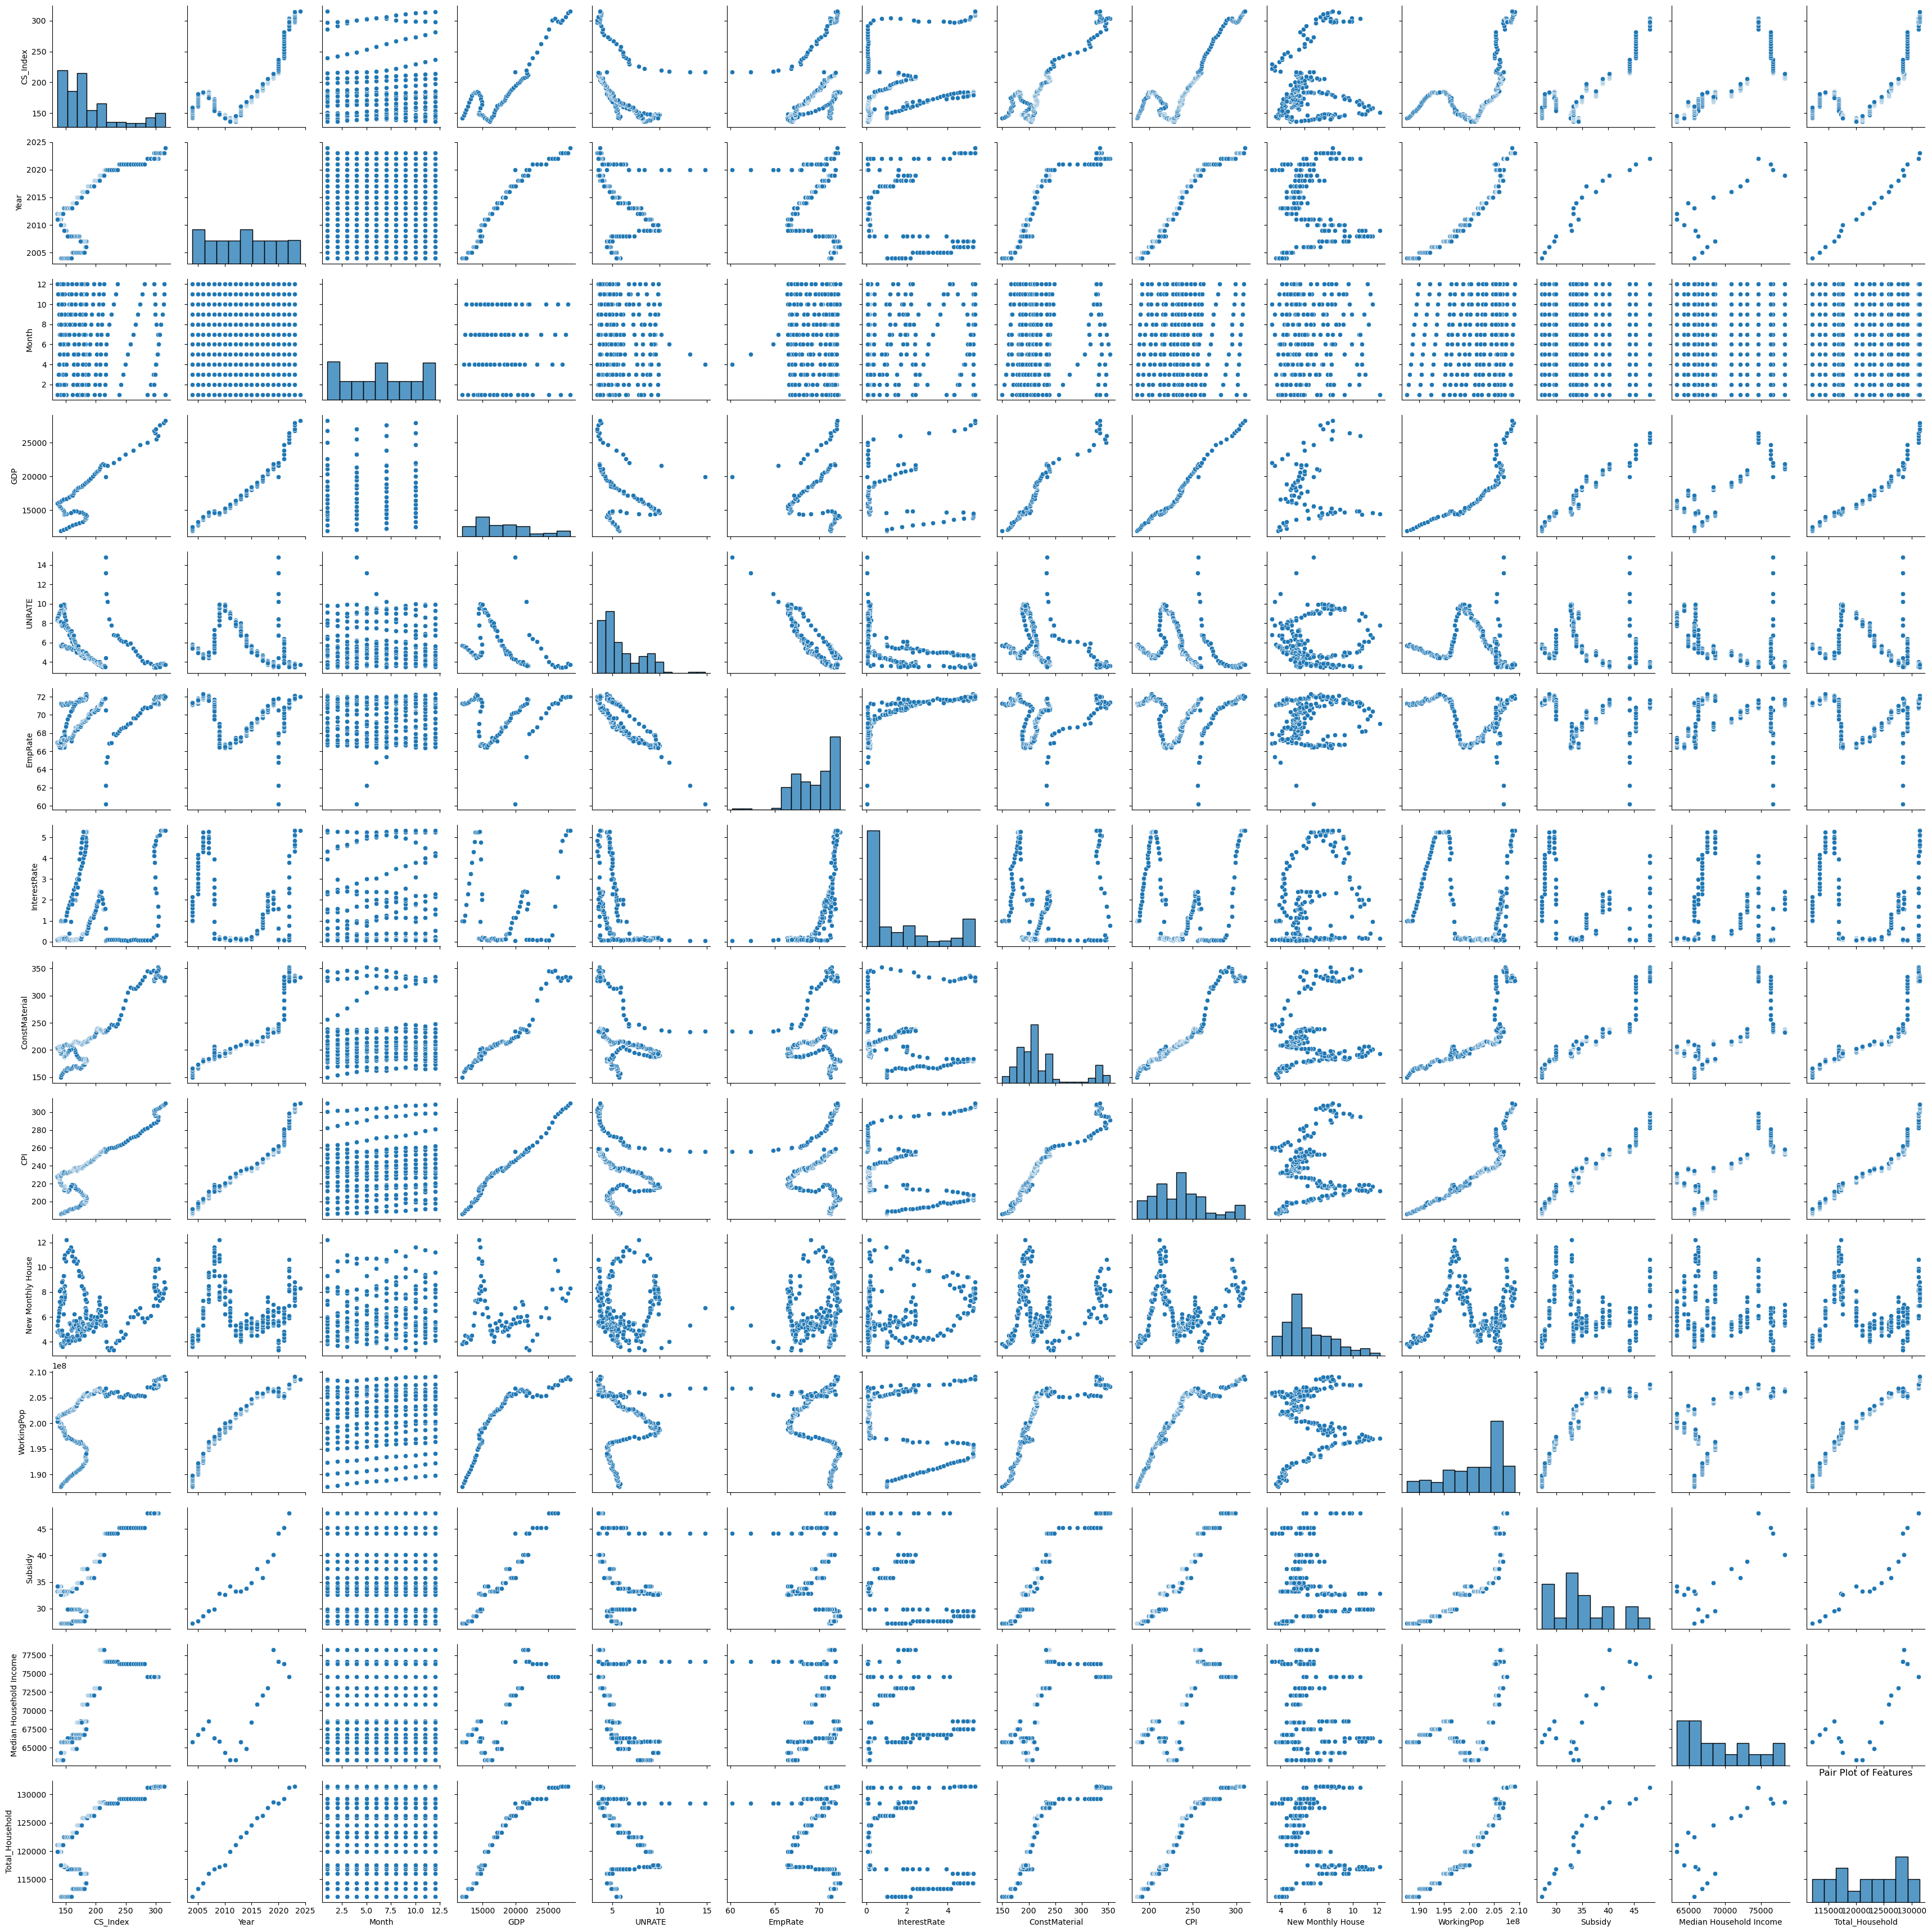

In [125]:
import seaborn as sns
sns.pairplot(data)
plt.title('Pair Plot of Features')
plt.show()


In [126]:
data_scaled.columns

Index(['DATE', 'CS_Index', 'Year', 'Month', 'GDP', 'UNRATE', 'EmpRate',
       'InterestRate', 'ConstMaterial', 'CPI', 'New Monthly House',
       'WorkingPop', 'Subsidy', 'Median Household Income', 'Total_Household'],
      dtype='object')

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

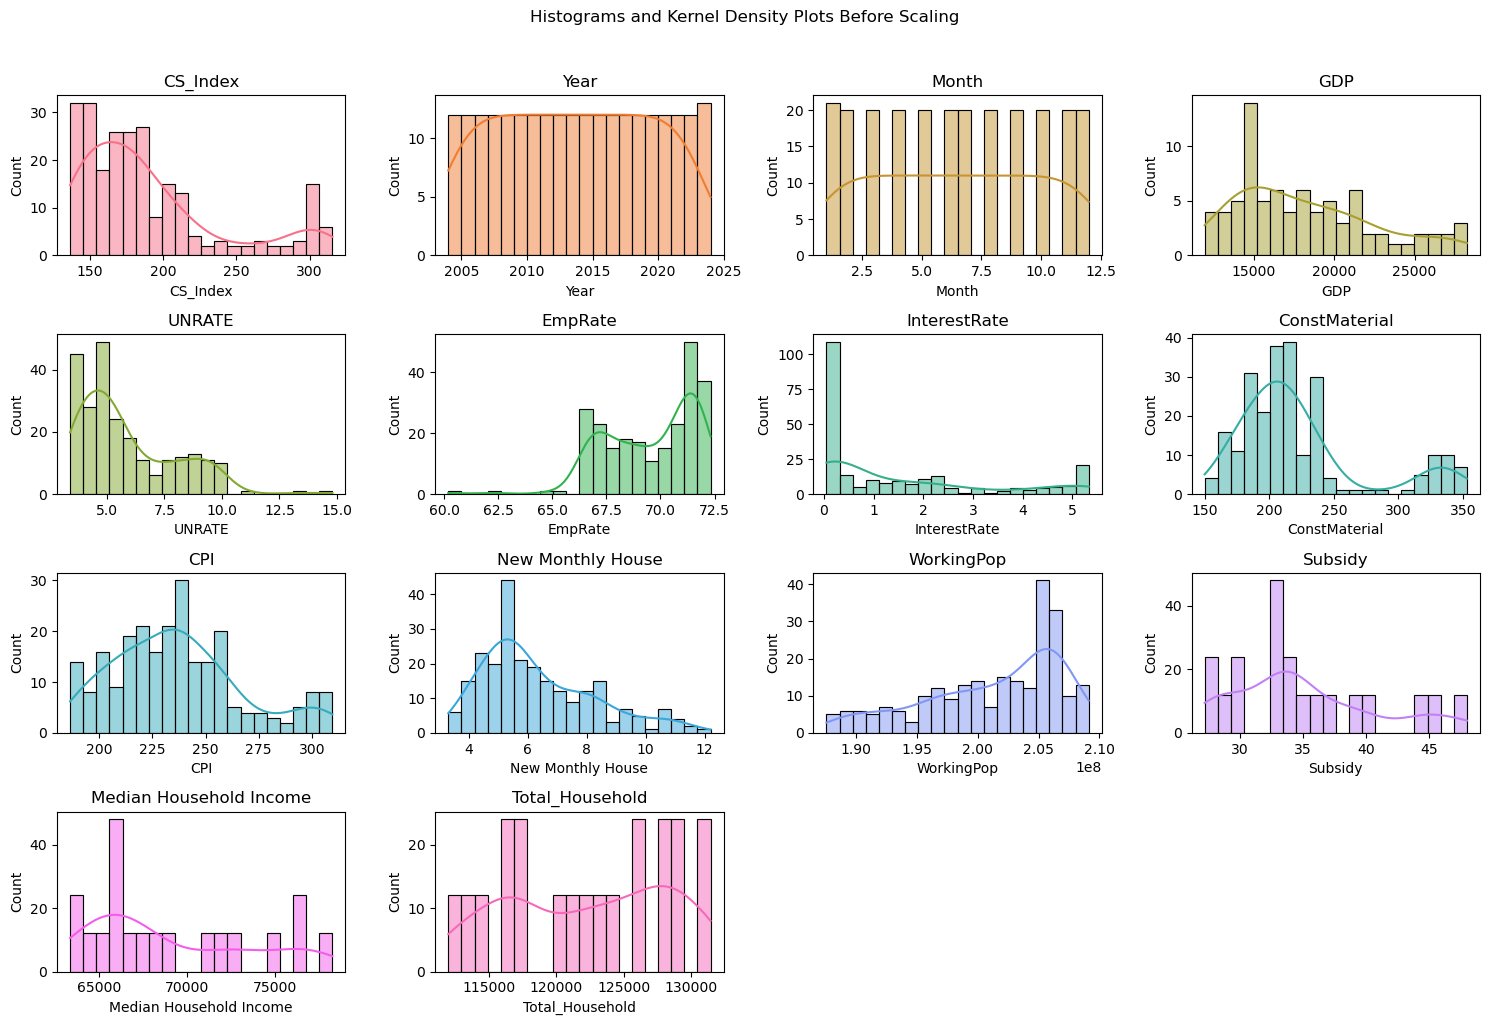

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define factors
factors = ['CS_Index', 'Year', 'Month', 'GDP', 'UNRATE', 'EmpRate',
           'InterestRate', 'ConstMaterial', 'CPI', 'New Monthly House',
           'WorkingPop', 'Subsidy', 'Median Household Income', 'Total_Household']

# Set a colorful palette
colors = sns.color_palette("husl", len(factors))

# Plot histograms and kernel density plots
plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[factor], bins=20, color=colors[i], kde=True)
    plt.title(factor)
plt.suptitle('Histograms and Kernel Density Plots Before Scaling', y=1.02)
plt.tight_layout()
plt.show()


C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DeLL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

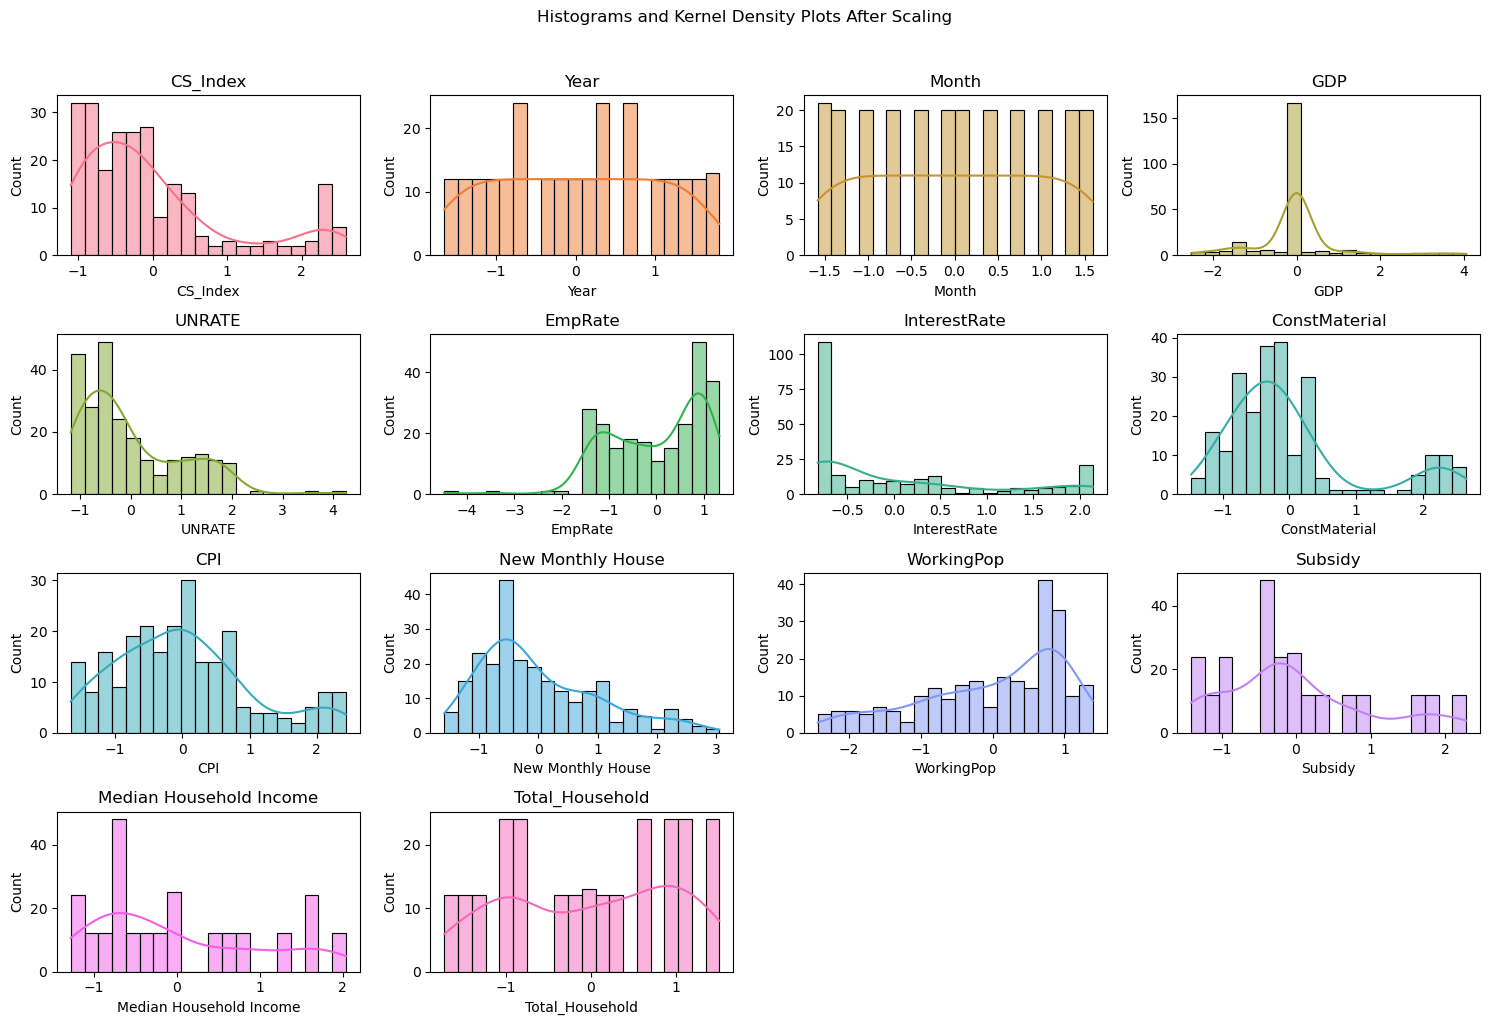

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define factors
factors = ['CS_Index', 'Year', 'Month', 'GDP', 'UNRATE', 'EmpRate',
           'InterestRate', 'ConstMaterial', 'CPI', 'New Monthly House',
           'WorkingPop', 'Subsidy', 'Median Household Income', 'Total_Household']

# Set a colorful palette
colors = sns.color_palette("husl", len(factors))

# Plot histograms and kernel density plots
plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data_scaled[factor], bins=20, color=colors[i], kde=True)
    plt.title(factor)
plt.suptitle('Histograms and Kernel Density Plots After Scaling', y=1.02)
plt.tight_layout()
plt.show()

In [129]:
X = data.drop(columns=['CS_Index', 'DATE'])
y = data['CS_Index']

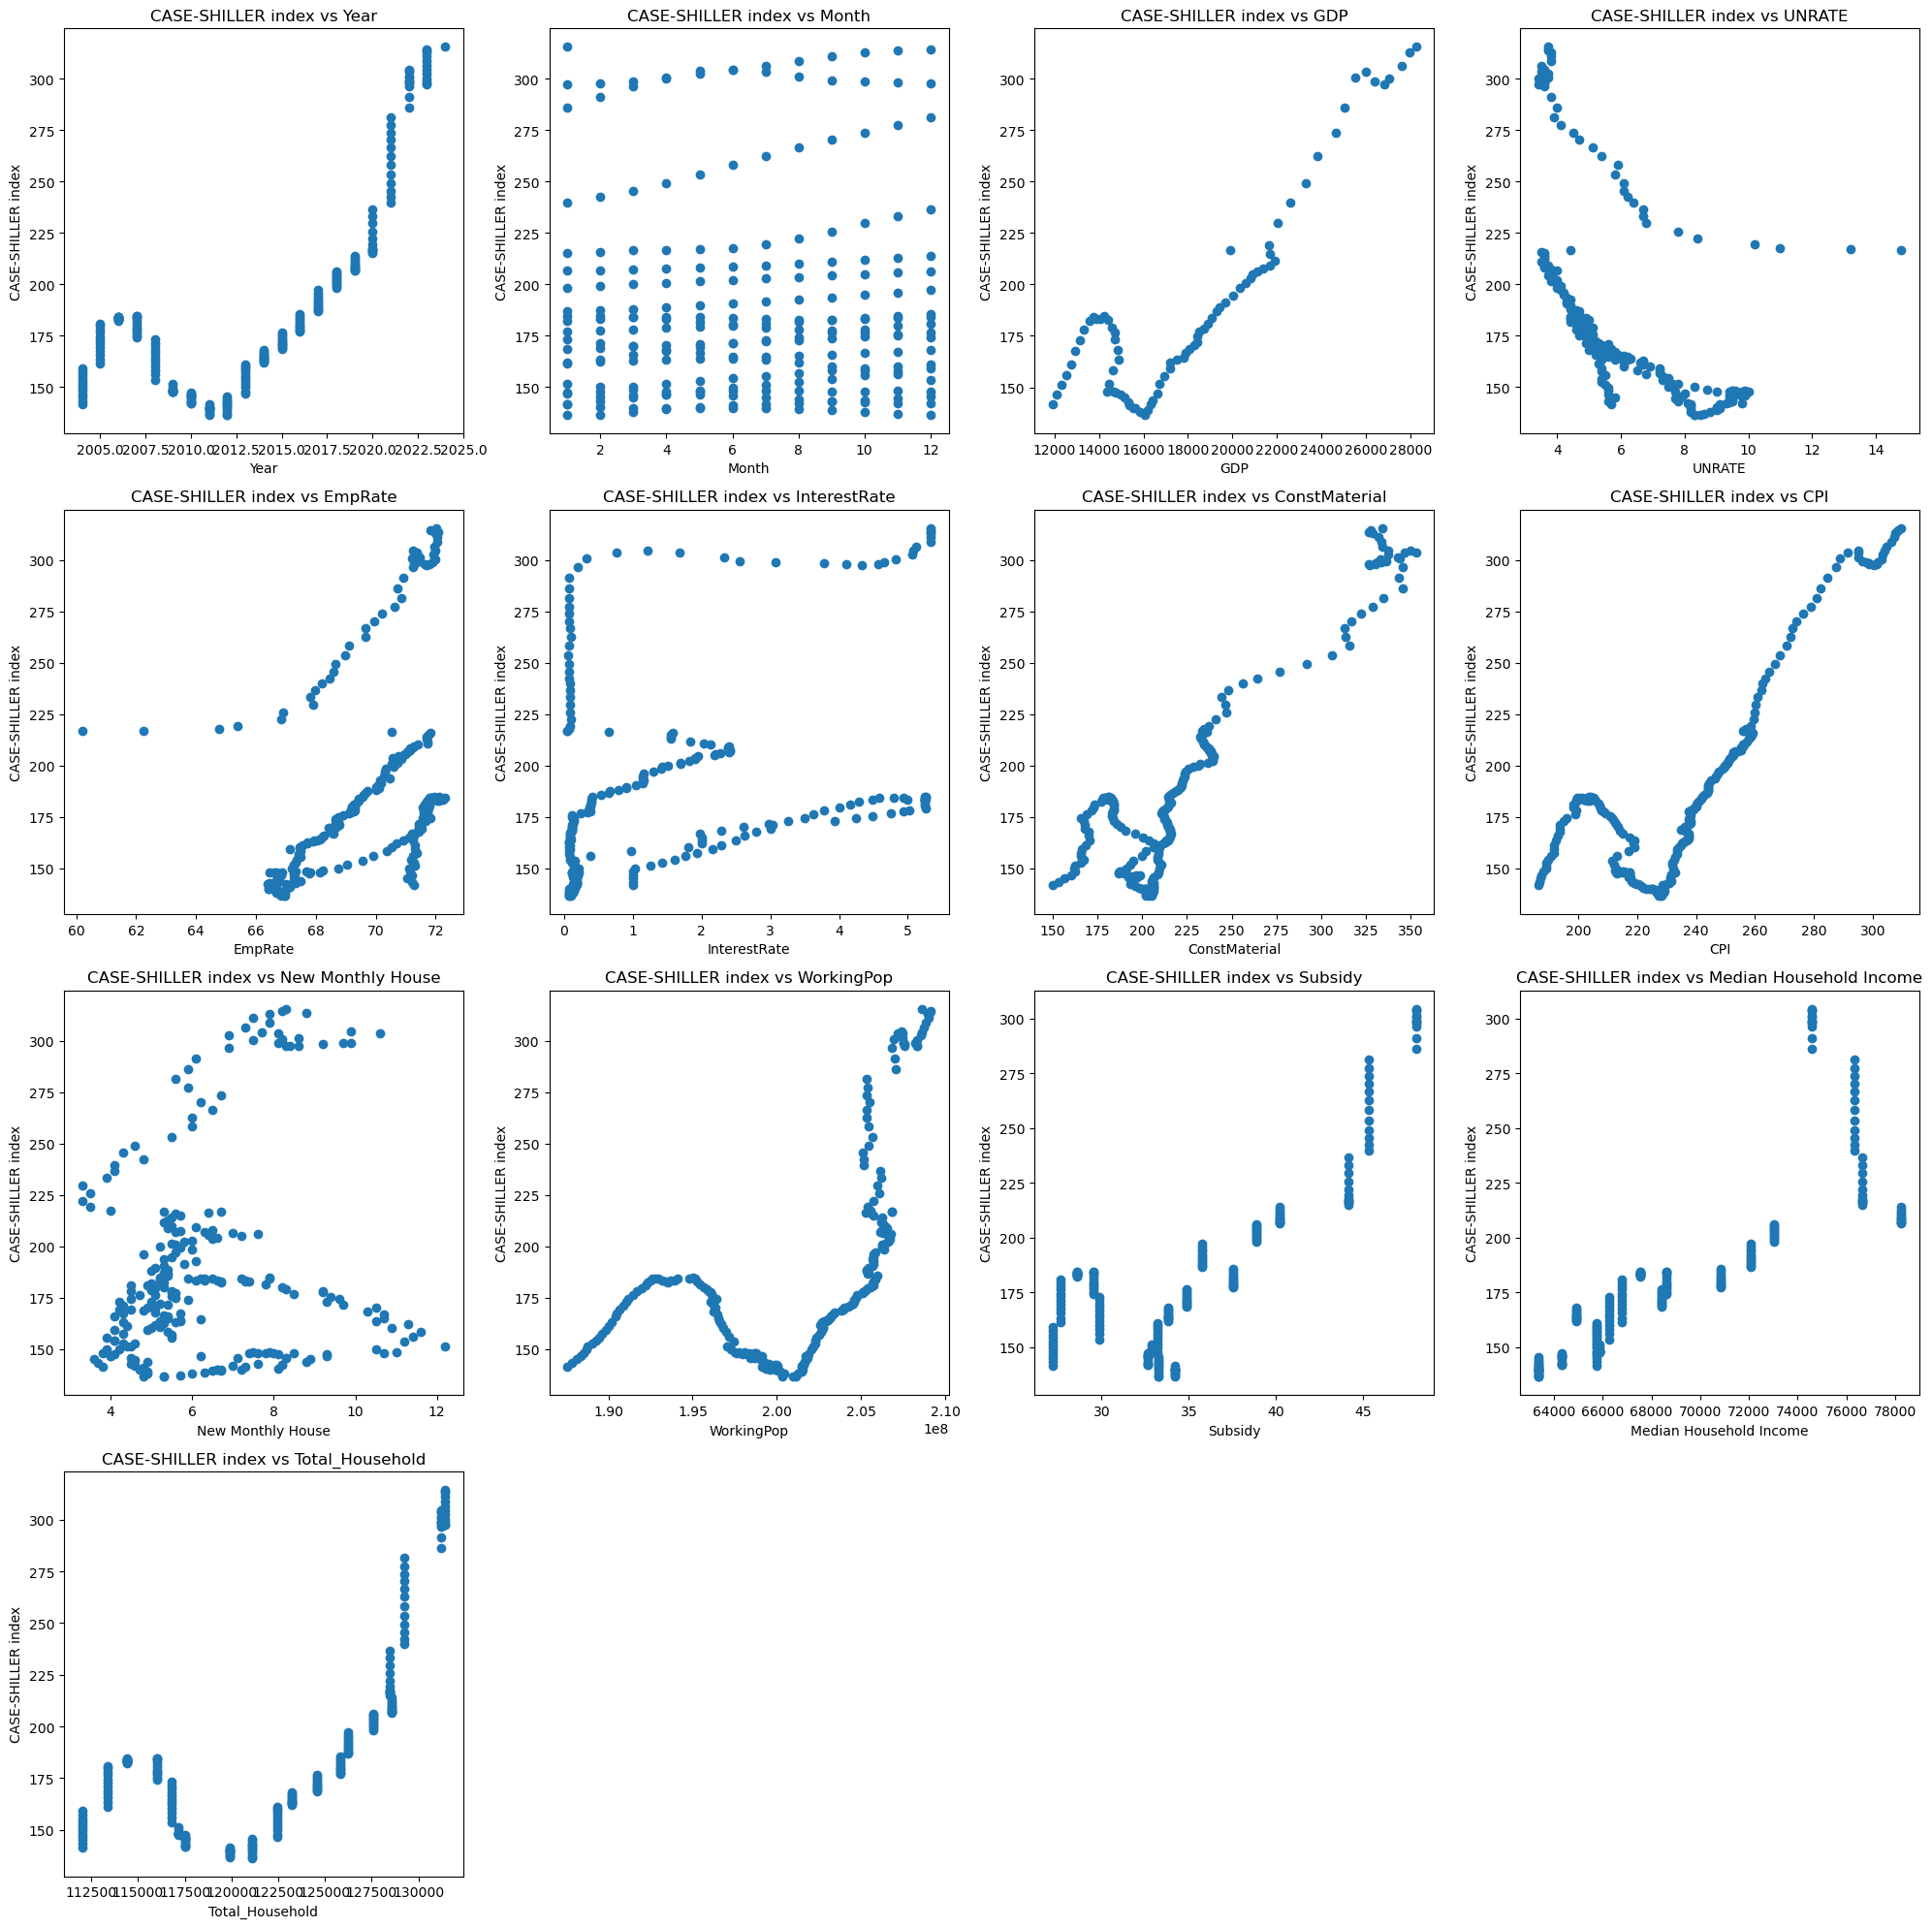

In [130]:
import matplotlib.pyplot as plt
import math

# Define the number of columns per row
num_cols = 4

# Calculate the number of rows needed
num_features = len(X.columns)
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate through each feature and create scatter plots
for i, feature in enumerate(X.columns):
    axes[i].scatter(x=X[feature], y=y)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("CASE-SHILLER index")
    axes[i].set_title(f"CASE-SHILLER index vs {feature}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# Correlations

In [131]:
X = data_scaled.drop(columns=['CS_Index', 'DATE'])
y = data_scaled['CS_Index']

In [132]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Correlation of following Features:")
print(sorted_correlations)

Correlation of following Features:
Month                      0.033702
New Monthly House          0.158042
InterestRate               0.369233
EmpRate                    0.444876
GDP                        0.526393
UNRATE                     0.562805
WorkingPop                 0.588444
Subsidy                    0.666667
Median Household Income    0.680910
Total_Household            0.724217
Year                       0.766444
CPI                        0.854477
ConstMaterial              0.915519
dtype: float64


## We can see that 
Month                      0.033702  
New Monthly House          0.158042  
InterestRate               0.369233  
EmpRate                    0.444876  
GDP                        0.526393  
UNRATE                     0.562805  

the above features have lower correlation values

# Feature Engineering

In [133]:
data_scaled['GDP_lag1'] = data_scaled['GDP'].shift(1)
data_scaled['UNRATE_lag1'] = data['UNRATE'].shift(1)
data_scaled.dropna(inplace=True)


In [134]:
data_scaled.head()

DATE  CS_Index      Year     Month       GDP    UNRATE   EmpRate  \
1  2004-02-01 -0.961103 -1.647216 -1.292869  0.000000 -0.134870  0.794518   
2  2004-03-01 -0.922581 -1.647216 -1.004101  0.000000 -0.039551  0.719386   
3  2004-04-01 -0.890930 -1.647216 -0.715332 -2.446963 -0.134870  0.790264   
4  2004-05-01 -0.858061 -1.647216 -0.426563  0.000000 -0.134870  0.765059   
5  2004-06-01 -0.823707 -1.647216 -0.137794  0.000000 -0.134870  0.748231   

   InterestRate  ConstMaterial       CPI  New Monthly House  WorkingPop  \
1     -0.281391      -1.403853 -1.648783          -1.379216   -2.385946   
2     -0.286992      -1.340919 -1.635503          -1.431348   -2.337165   
3     -0.286992      -1.267834 -1.625543          -1.222821   -2.296234   
4     -0.286992      -1.215050 -1.598984          -1.327085   -2.260168   
5     -0.270188      -1.229261 -1.575745          -1.274953   -2.233354   

    Subsidy  Median Household Income  Total_Household  GDP_lag1  UNRATE_lag1  
1 -1.408165                -0.738828        -1.723439 -2.523327          5.7  
2 -1.408165                -0.738828        -1.723439  0.000000          5.6  
3 -1.408165                -0.738828        -1.723439  0.000000          5.8  
4 -1.408165                -0.738828        -1.723439 -2.446963          5.6  
5 -1.408165                -0.738828        -1.723439  0.000000          5.6

# Model Building

## Train Test Split

In [135]:
# Separate features and target variable
# Let's call this data as Normal dataset
X = data_scaled.drop(columns=['CS_Index', 'DATE'])
y = data_scaled['CS_Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


In [136]:
# Dropping the columns that have lower correlation values
# Let's call this data as X1 Dataset

X1 = data_scaled.drop(columns=['CS_Index', 'DATE', 'Month', 'New Monthly House', 'InterestRate', 'EmpRate', 'UNRATE', 'WorkingPop'])
y1 = data_scaled['CS_Index']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=43)


## Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Linear Regression R2:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression R2: 0.9667440290987017
Linear Regression RMSE: 0.16094221400309563


In [138]:
# Applying Linear Regression on X1 Dataset

from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)

print('Linear Regression1 R2:', r2_score(y1_test, y1_pred))
print('Linear Regression1 RMSE:', np.sqrt(mean_squared_error(y1_test, y1_pred)))


Linear Regression1 R2: 0.9393167709473842
Linear Regression1 RMSE: 0.21740498436760036


In [ ]:
# We can see that the Linear Regression is performing better on the normal dataset

## Random Forest

In [139]:
# Applying Random Forest on normal dataset
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=43)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest R2:', r2_score(y_test, y_pred_rf))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.9976628293493617
Random Forest RMSE: 0.04266584660656406


In [140]:
# Applying Random Forest on X1 Dataset
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(random_state=43)
rf1.fit(X1_train, y1_train)
y1_pred_rf1 = rf1.predict(X1_test)

print('Random Forest1 R2:', r2_score(y1_test, y1_pred_rf1))
print('Random Forest1 RMSE:', np.sqrt(mean_squared_error(y1_test, y1_pred_rf1)))

Random Forest1 R2: 0.997026324867102
Random Forest1 RMSE: 0.04812623819510474


In [54]:
# The Random Forest algorithm is performing better on X1 Dataset

## Other Models 

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42),
    "DT" : DecisionTreeRegressor(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: R2 = {r2:.4f}, RMSE = {rmse:.2f}")


Linear Regression: R2 = 0.9667, RMSE = 0.16
Lasso: R2 = 0.0403, RMSE = 0.86
Ridge: R2 = 0.9652, RMSE = 0.16
Random Forest: R2 = 0.9972, RMSE = 0.05
Gradient Boosting: R2 = 0.9978, RMSE = 0.04
AdaBoost: R2 = 0.9903, RMSE = 0.09
SVR: R2 = 0.9878, RMSE = 0.10
K-Nearest Neighbors: R2 = 0.9847, RMSE = 0.11
XGBoost: R2 = 0.9935, RMSE = 0.07
DT: R2 = 0.9890, RMSE = 0.09


In [144]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42),
    "DT" : DecisionTreeRegressor(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    r2 = r2_score(y1_test, y1_pred)
    rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
    print(f"{name}: R2 = {r2:.4f}, RMSE = {rmse:.2f}")
    


Linear Regression: R2 = 0.9393, RMSE = 0.22
Lasso: R2 = 0.0403, RMSE = 0.86
Ridge: R2 = 0.9413, RMSE = 0.21
Random Forest: R2 = 0.9969, RMSE = 0.05
Gradient Boosting: R2 = 0.9972, RMSE = 0.05
AdaBoost: R2 = 0.9900, RMSE = 0.09
SVR: R2 = 0.9770, RMSE = 0.13
K-Nearest Neighbors: R2 = 0.9838, RMSE = 0.11
XGBoost: R2 = 0.9946, RMSE = 0.06
DT: R2 = 0.9962, RMSE = 0.05


Model: Linear Regression
Mean Squared Error: 0.02590239624821823
R-squared: 0.9667440290987017
Coefficients:
Year: 0.7637813161905892
Month: 0.04217514635113516
GDP: -0.0004286931473799174
UNRATE: -0.1869064365169389
EmpRate: -0.22005698531213747
InterestRate: 0.2559751689377901
ConstMaterial: 0.5859237401250108
CPI: 0.18235046509720462
New Monthly House: 0.043717466193574334
WorkingPop: -0.7084786291802783
Subsidy: -0.06652167362463095
Median Household Income: 0.20221304776161605
Total_Household: -0.13346690717952966
GDP_lag1: 0.00867867993740156
UNRATE_lag1: -0.004969365837271985
Intercept: 0.03288865007996472

Model: Lasso
Mean Squared Error: 0.7475155499863243
R-squared: 0.040268122671346496
Coefficients:
Year: 0.0
Month: 0.0
GDP: 0.0
UNRATE: -0.0
EmpRate: 0.0
InterestRate: 0.0
ConstMaterial: 0.0
CPI: 0.0
New Monthly House: 0.0
WorkingPop: 0.0
Subsidy: 0.0
Median Household Income: 0.0
Total_Household: 0.0
GDP_lag1: 0.0
UNRATE_lag1: -0.04278820966579544
Intercept: 0.3006762949074508

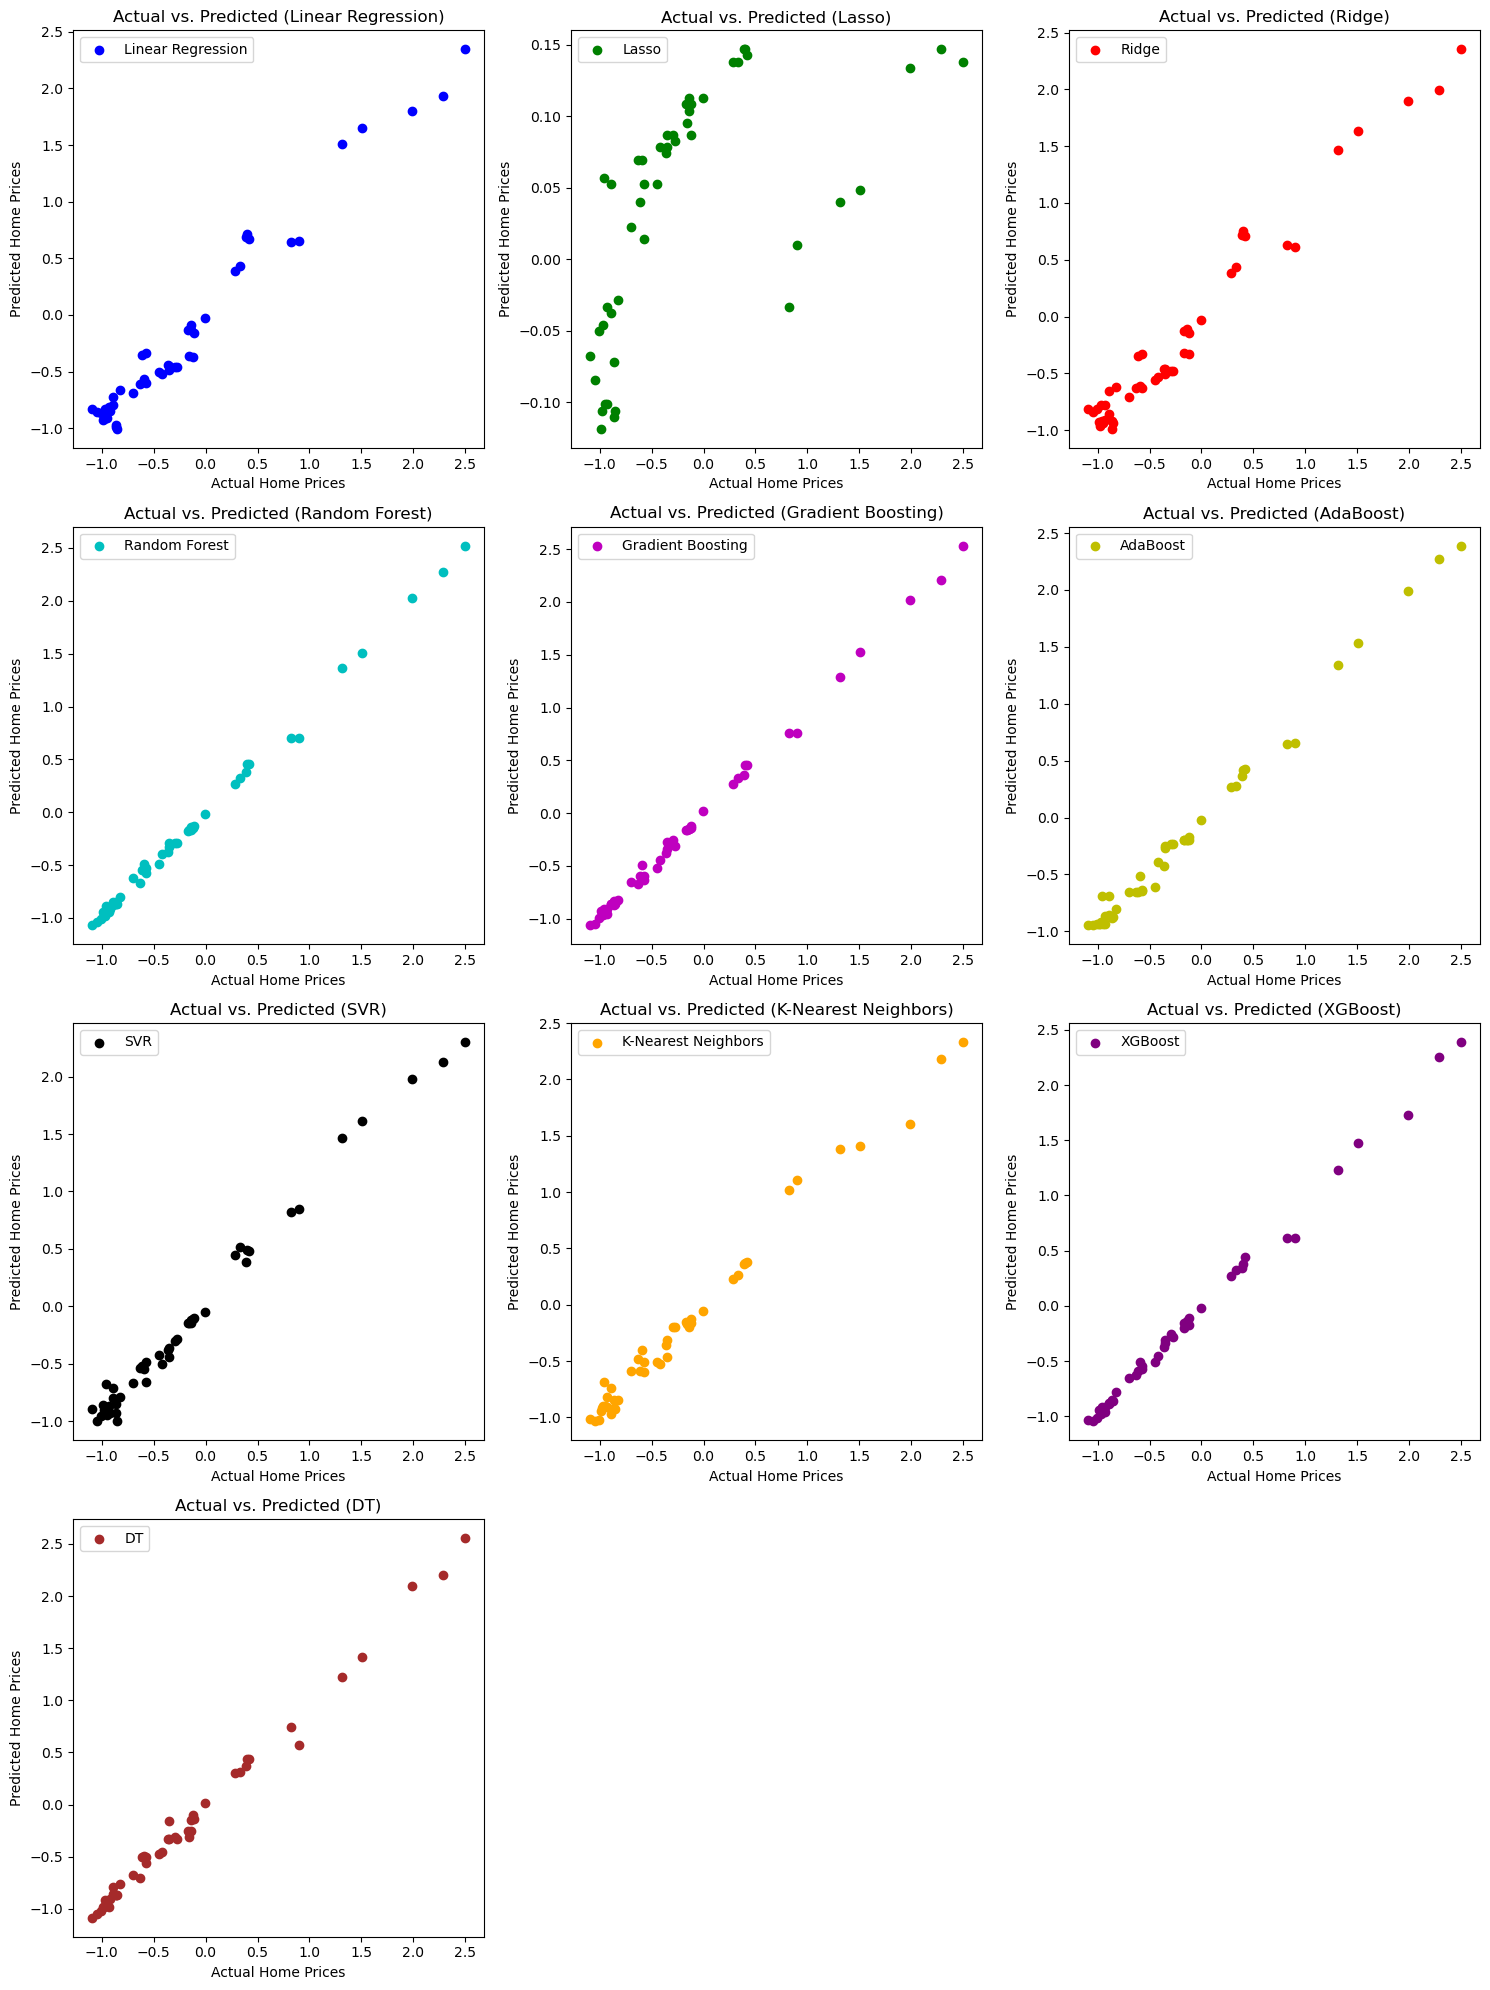

Model: Linear Regression
Cross-Validation R-squared: 0.9497906337788171
Model: Lasso
Cross-Validation R-squared: 0.023674589153292357
Model: Ridge
Cross-Validation R-squared: 0.9590380235064864
Model: Random Forest
Cross-Validation R-squared: 0.9968711273246518
Model: Gradient Boosting
Cross-Validation R-squared: 0.9970711551493239
Model: AdaBoost
Cross-Validation R-squared: 0.990874927771625
Model: SVR
Cross-Validation R-squared: 0.9858042685580337
Model: K-Nearest Neighbors
Cross-Validation R-squared: 0.9791223466102583
Model: XGBoost
Cross-Validation R-squared: 0.9963715068224441
Model: DT
Cross-Validation R-squared: 0.9945060761896117

Best Model: GradientBoostingRegressor with Cross-Validation R-squared: 0.9970711551493239


In [145]:
# Calculate the number of rows and columns needed for subplots
num_models = len(models)
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols  

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axs = axs.flatten()


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']  

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    

    
    
    axs[i].scatter(y_test, y_pred, label=name, color=colors[i % len(colors)])
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


import numpy as np
from sklearn.model_selection import cross_val_score

best_model = None
best_r2 = -np.inf 

for name, model in models.items():
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
   
    mean_r2 = np.mean(cv_scores)
    
    print(f"Model: {name}")
    print(f"Cross-Validation R-squared: {mean_r2}")
    
    
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Cross-Validation R-squared: {best_r2}")

# Extracting important Features

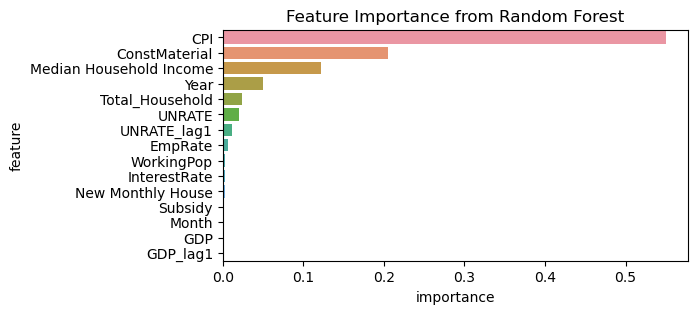

In [147]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(6,3))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

DT R2: 0.8288320012225849
DT RMSE: 0.4162793433937652


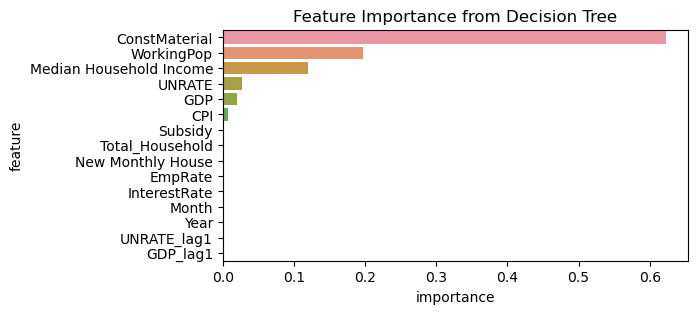

In [71]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)


print('DT R2:', r2_score(y_test, y_pred_DT))
print('DT RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_DT)))
importances = DT.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(6,3))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()

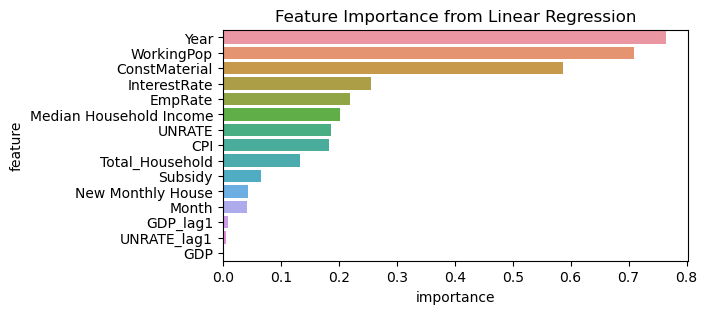

In [148]:
coefficients = lr.coef_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': np.abs(coefficients)}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(6, 3))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Linear Regression')
plt.show()

GBR R2: 0.9978464577980202
GBR RMSE: 0.04095546385887566


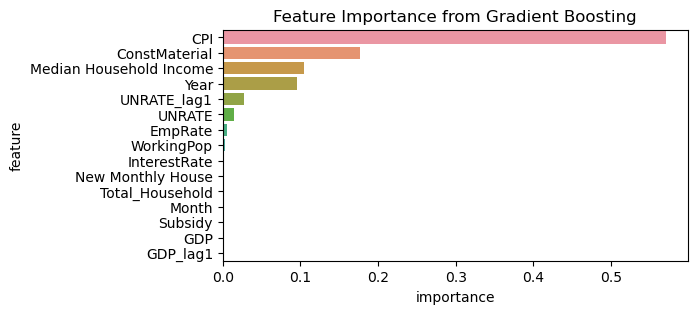

In [149]:

GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train, y_train)
y_pred_GBR = GBR.predict(X_test)

print('GBR R2:', r2_score(y_test, y_pred_GBR))
print('GBR RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_GBR)))

importances = GBR.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(6,3))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()


### From the above plots we can observe that the most important factors affecting the US House Price are - cost of material, Subsidy, Median Household Income, CPI, GDP, Unemployment Rate, Working Population, Number of total households, etc

# Interactive Visualizations

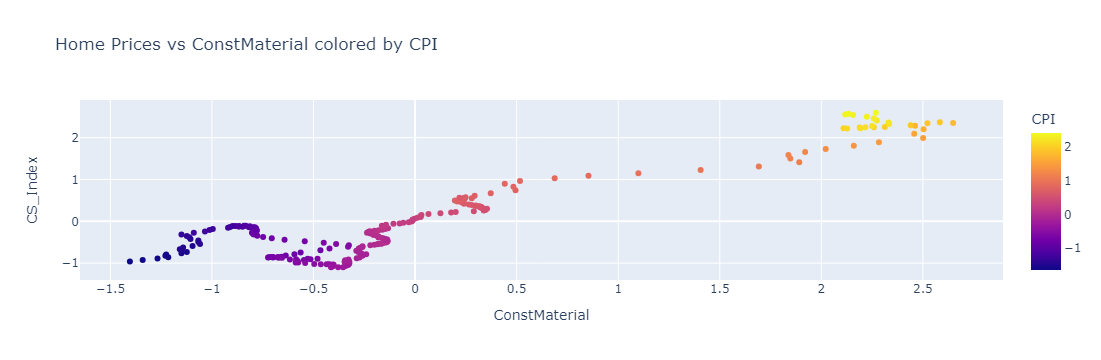

In [150]:
# As Cost of Construction Material is one of the most influencing factors let's plot Cost of construction Material with CS_Index and CPI
import plotly.express as px

fig = px.scatter(data_scaled, x='ConstMaterial', y='CS_Index', color='CPI',
                 title='Home Prices vs ConstMaterial colored by CPI',
                 labels={'ConstMaterial':'ConstMaterial', 'CS_Index':'CS_Index', 'CPI':'CPI'})
fig.show()


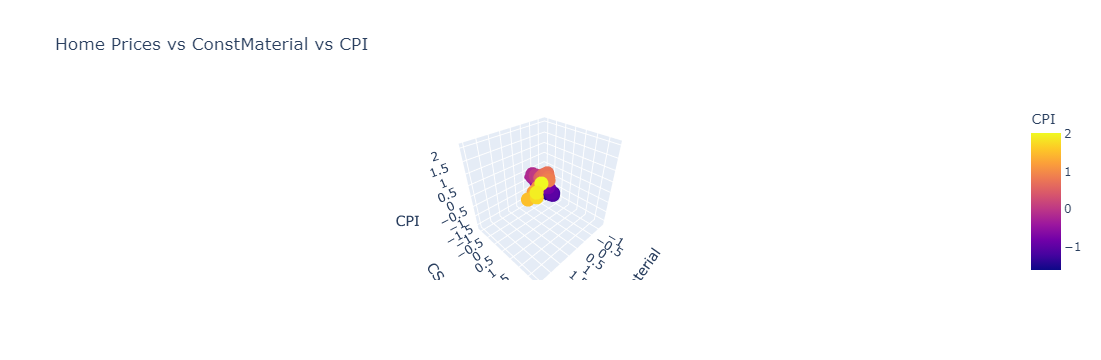

In [83]:
import plotly.express as px

fig = px.scatter_3d(data_scaled, x='ConstMaterial', y='CS_Index', z='CPI', color='CPI',
                    title='Home Prices vs ConstMaterial vs CPI',
                    labels={'ConstMaterial':'ConstMaterial', 'CS_Index':'CS_Index', 'CPI':'CPI'})
fig.show()


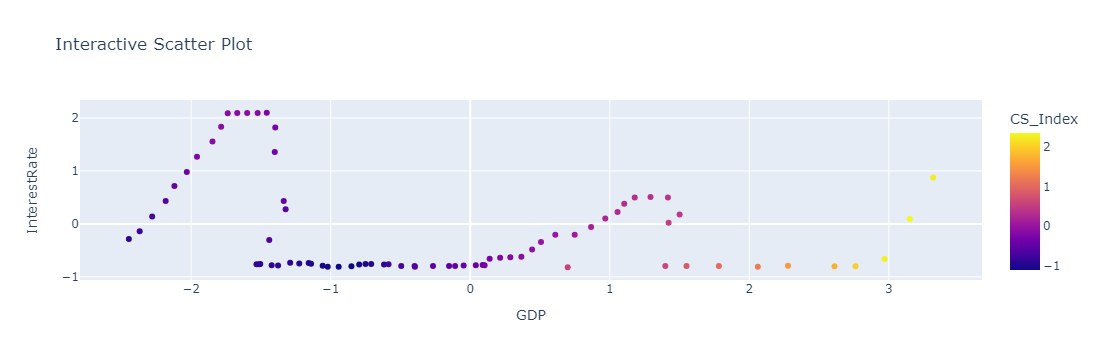

In [85]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(data_frame=data_scaled, x='GDP', y='InterestRate', color='CS_Index', hover_name='Year', title='Interactive Scatter Plot')
fig.show()


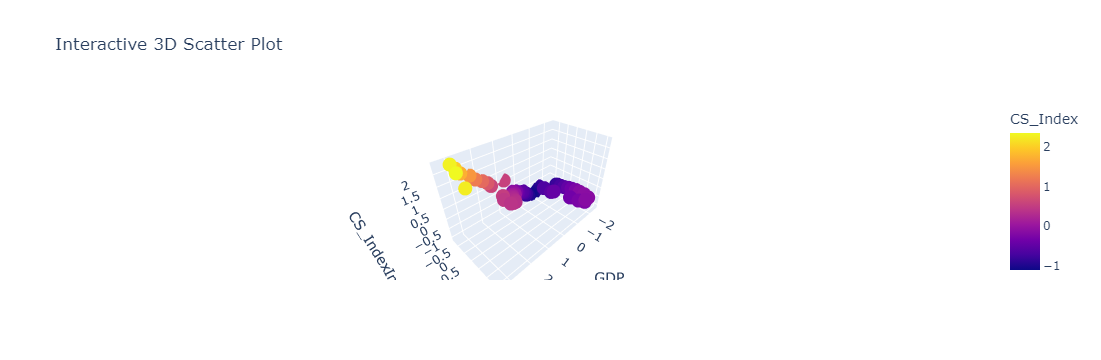

In [84]:
import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(data_frame=data_scaled, x='GDP', y='InterestRate', z='CS_Index', color='CS_Index', hover_name='Year', title='Interactive 3D Scatter Plot')
fig.show()
